In [1]:
# import
from cifardef import *
from PIL import Image  
import torch,math,os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# network definition
class lenet6(nn.Module):
    def __init__(self,in_dim,n_class):
        super(lenet6, self).__init__()
        self.m1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1
                      ),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Sigmoid()
        )  # 对应图中的C1,S1
        self.m2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1
                      ),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Sigmoid()
        )  # 对应图中的C3,S4
        self.dropout = nn.Dropout(p=0.5)
        self.m3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=3)
        )  # 对应图中的C5
        self.linear = nn.Sequential(
            nn.Linear(1920, 10)
        )  # 对应最后的全连接层

    def forward(self, x):
        out = self.m1(x)
        out = F.dropout(out, p=0.5, training=self.training)
        out = self.m2(out)
        out = F.dropout(out, p=0.5, training=self.training)
        out = self.m3(out)
        out = F.dropout(out, p=0.5, training=self.training)
        out = m3.view(out.size(0), -1)
        output = self.linear(m3)
        return output


In [3]:
PATH='Lenet.pkl'
model = lenet5(3,10)
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')

lenet5(
  (m1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sigmoid()
  )
  (m2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sigmoid()
  )
  (m3): Sequential(
    (0): Conv2d(16, 120, kernel_size=(3, 3), stride=(1, 1))
  )
  (linear): Sequential(
    (0): Linear(in_features=1920, out_features=10, bias=True)
  )
)


In [9]:
batch_size = 128
learning_rate = 0.0005
num_epoches = 1000

transform = transforms.Compose(
    [
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
# train_dataset = cifar_10('data/cifar-10-batches-py',
#                          train=True, transform=transform,index=2)
test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform)
meta=unpickle('data/cifar-10-batches-py/batches.meta')
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss() # 交叉熵损失函数常用于分类
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()

In [10]:
epochs=1000

for epoch in range(1, epochs + 1):
    for t in train_loaderList:
            train(model,num_epoches,criterion,optimizer,t)
            acc, loss = test(model, 1, criterion, test_loader)
torch.save(model.state_dict(), 'Lenet.pkl')

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.779155

Test set: Average loss: 1.5009, Accuracy: 4542/10000 (45%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.087736

Test set: Average loss: 1.4602, Accuracy: 4786/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.220107

Test set: Average loss: 1.4646, Accuracy: 4798/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.703398

Test set: Average loss: 1.4717, Accuracy: 4697/10000 (47%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.926197

Test set: Average loss: 1.4724, Accuracy: 4790/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.453522

Test set: Average loss: 1.4603, Accuracy: 4779/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.383475

Test set: Average loss: 1.4662, Accuracy: 4733/10000 (47%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.476860

Test set: Average loss: 1.4625, Accuracy: 4849/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.745113

Test set: Average loss: 1.4596, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.115932

Test set: Average loss: 1.4522, Accuracy: 4853/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.175245

Test set: Average loss: 1.4530, Accuracy: 4854/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.494729

Test set: Average loss: 1.4524, Accuracy: 4825/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.344015

Test set: Average loss: 1.4523, Accuracy: 4810/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.132740

Test set: Average loss: 1.4527, Accuracy: 4835/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.480831

Test set: Average loss: 1.4530, Accuracy: 4851/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.324656

Test set: Average loss: 1.4537, Accuracy: 4846/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.108090

Test set: Average loss: 1.4554, Accuracy: 4779/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.588706

Test set: Average loss: 1.4524, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.401564

Test set: Average loss: 1.4493, Accuracy: 4839/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.184119

Test set: Average loss: 1.4489, Accuracy: 4862/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.947736

Test set: Average loss: 1.4496, Accuracy: 4855/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.136360

Test set: Average loss: 1.4491, Accuracy: 4855/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.320904

Test set: Average loss: 1.4497, Accuracy: 4852/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.762162

Test set: Average loss: 1.4489, Accuracy: 4856/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.620339

Test set: Average loss: 1.4491, Accuracy: 4868/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.634395

Test set: Average loss: 1.4487, Accuracy: 4858/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.009484

Test set: Average loss: 1.4495, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.648521

Test set: Average loss: 1.4468, Accuracy: 4863/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.656504

Test set: Average loss: 1.4488, Accuracy: 4842/10000 (48%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.299322

Test set: Average loss: 1.4472, Accuracy: 4855/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.468572

Test set: Average loss: 1.4468, Accuracy: 4860/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.174255

Test set: Average loss: 1.4466, Accuracy: 4860/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.610831

Test set: Average loss: 1.4464, Accuracy: 4869/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.373719

Test set: Average loss: 1.4467, Accuracy: 4863/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.681134

Test set: Average loss: 1.4467, Accuracy: 4864/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.407638

Test set: Average loss: 1.4465, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.292369

Test set: Average loss: 1.4449, Accuracy: 4885/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.172895

Test set: Average loss: 1.4453, Accuracy: 4871/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.398208

Test set: Average loss: 1.4448, Accuracy: 4886/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.315906

Test set: Average loss: 1.4449, Accuracy: 4880/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.681296

Test set: Average loss: 1.4448, Accuracy: 4859/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.429192

Test set: Average loss: 1.4446, Accuracy: 4872/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.139997

Test set: Average loss: 1.4455, Accuracy: 4883/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.543150

Test set: Average loss: 1.4446, Accuracy: 4887/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.478606

Test set: Average loss: 1.4448, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.040038

Test set: Average loss: 1.4431, Accuracy: 4880/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.504270

Test set: Average loss: 1.4431, Accuracy: 4864/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.148676

Test set: Average loss: 1.4431, Accuracy: 4882/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.281471

Test set: Average loss: 1.4432, Accuracy: 4875/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.187047

Test set: Average loss: 1.4432, Accuracy: 4878/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.324308

Test set: Average loss: 1.4430, Accuracy: 4874/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.286557

Test set: Average loss: 1.4431, Accuracy: 4861/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.419053

Test set: Average loss: 1.4428, Accuracy: 4886/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.652544

Test set: Average loss: 1.4434, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.989150

Test set: Average loss: 1.4424, Accuracy: 4886/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.481272

Test set: Average loss: 1.4416, Accuracy: 4907/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.500786

Test set: Average loss: 1.4416, Accuracy: 4892/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.732834

Test set: Average loss: 1.4416, Accuracy: 4878/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.866385

Test set: Average loss: 1.4416, Accuracy: 4886/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.519549

Test set: Average loss: 1.4419, Accuracy: 4891/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.617108

Test set: Average loss: 1.4415, Accuracy: 4887/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.191962

Test set: Average loss: 1.4419, Accuracy: 4878/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.341130

Test set: Average loss: 1.4413, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.257419

Test set: Average loss: 1.4403, Accuracy: 4884/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.083435

Test set: Average loss: 1.4403, Accuracy: 4894/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.611908

Test set: Average loss: 1.4402, Accuracy: 4890/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.371105

Test set: Average loss: 1.4402, Accuracy: 4895/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.632222

Test set: Average loss: 1.4410, Accuracy: 4876/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.125180

Test set: Average loss: 1.4401, Accuracy: 4885/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.374786

Test set: Average loss: 1.4402, Accuracy: 4894/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.438690

Test set: Average loss: 1.4403, Accuracy: 4893/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.448692

Test set: Average loss: 1.4400, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.992381

Test set: Average loss: 1.4392, Accuracy: 4909/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.261933

Test set: Average loss: 1.4395, Accuracy: 4887/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.700923

Test set: Average loss: 1.4394, Accuracy: 4878/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.570813

Test set: Average loss: 1.4389, Accuracy: 4898/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.281112

Test set: Average loss: 1.4390, Accuracy: 4895/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.655556

Test set: Average loss: 1.4389, Accuracy: 4904/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.122592

Test set: Average loss: 1.4391, Accuracy: 4886/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.273124

Test set: Average loss: 1.4389, Accuracy: 4885/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.269453

Test set: Average loss: 1.4389, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.460320

Test set: Average loss: 1.4379, Accuracy: 4894/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.718473

Test set: Average loss: 1.4379, Accuracy: 4903/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.129073

Test set: Average loss: 1.4379, Accuracy: 4912/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.329744

Test set: Average loss: 1.4381, Accuracy: 4895/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.604720

Test set: Average loss: 1.4378, Accuracy: 4897/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.728143

Test set: Average loss: 1.4380, Accuracy: 4899/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.543981

Test set: Average loss: 1.4380, Accuracy: 4896/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.779969

Test set: Average loss: 1.4378, Accuracy: 4911/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.195163

Test set: Average loss: 1.4380, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.093822

Test set: Average loss: 1.4371, Accuracy: 4904/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.548120

Test set: Average loss: 1.4367, Accuracy: 4911/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.156937

Test set: Average loss: 1.4368, Accuracy: 4898/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.541938

Test set: Average loss: 1.4368, Accuracy: 4901/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.740505

Test set: Average loss: 1.4367, Accuracy: 4912/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.282152

Test set: Average loss: 1.4367, Accuracy: 4900/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.386140

Test set: Average loss: 1.4366, Accuracy: 4909/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.453589

Test set: Average loss: 1.4366, Accuracy: 4910/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.787606

Test set: Average loss: 1.4370, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.328942

Test set: Average loss: 1.4358, Accuracy: 4906/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.433313

Test set: Average loss: 1.4358, Accuracy: 4925/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.360739

Test set: Average loss: 1.4357, Accuracy: 4903/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.374381

Test set: Average loss: 1.4357, Accuracy: 4907/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.099099

Test set: Average loss: 1.4359, Accuracy: 4922/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.784146

Test set: Average loss: 1.4362, Accuracy: 4894/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.685571

Test set: Average loss: 1.4359, Accuracy: 4923/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.325849

Test set: Average loss: 1.4360, Accuracy: 4900/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.354308

Test set: Average loss: 1.4357, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.694935

Test set: Average loss: 1.4349, Accuracy: 4918/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.337944

Test set: Average loss: 1.4349, Accuracy: 4929/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.489770

Test set: Average loss: 1.4348, Accuracy: 4915/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.632271

Test set: Average loss: 1.4349, Accuracy: 4921/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.824176

Test set: Average loss: 1.4351, Accuracy: 4898/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.779704

Test set: Average loss: 1.4350, Accuracy: 4900/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.969267

Test set: Average loss: 1.4348, Accuracy: 4909/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.504799

Test set: Average loss: 1.4348, Accuracy: 4905/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.007009

Test set: Average loss: 1.4350, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.507414

Test set: Average loss: 1.4340, Accuracy: 4906/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.010055

Test set: Average loss: 1.4341, Accuracy: 4909/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.478054

Test set: Average loss: 1.4340, Accuracy: 4906/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.395343

Test set: Average loss: 1.4339, Accuracy: 4913/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.554515

Test set: Average loss: 1.4340, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.348990

Test set: Average loss: 1.4339, Accuracy: 4928/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.992894

Test set: Average loss: 1.4340, Accuracy: 4908/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.408717

Test set: Average loss: 1.4338, Accuracy: 4922/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.580411

Test set: Average loss: 1.4338, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.549492

Test set: Average loss: 1.4332, Accuracy: 4920/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.790694

Test set: Average loss: 1.4333, Accuracy: 4928/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.756955

Test set: Average loss: 1.4331, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.202749

Test set: Average loss: 1.4331, Accuracy: 4918/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.213389

Test set: Average loss: 1.4330, Accuracy: 4926/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.604479

Test set: Average loss: 1.4330, Accuracy: 4923/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.731623

Test set: Average loss: 1.4332, Accuracy: 4921/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.999243

Test set: Average loss: 1.4330, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.362162

Test set: Average loss: 1.4330, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.623322

Test set: Average loss: 1.4322, Accuracy: 4934/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.410649

Test set: Average loss: 1.4322, Accuracy: 4928/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.339138

Test set: Average loss: 1.4322, Accuracy: 4927/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.266597

Test set: Average loss: 1.4323, Accuracy: 4923/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.529004

Test set: Average loss: 1.4322, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.512850

Test set: Average loss: 1.4324, Accuracy: 4916/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.724327

Test set: Average loss: 1.4323, Accuracy: 4907/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.472048

Test set: Average loss: 1.4322, Accuracy: 4927/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.348493

Test set: Average loss: 1.4323, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.740744

Test set: Average loss: 1.4316, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.594743

Test set: Average loss: 1.4317, Accuracy: 4942/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.279120

Test set: Average loss: 1.4316, Accuracy: 4936/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.001849

Test set: Average loss: 1.4314, Accuracy: 4932/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.580756

Test set: Average loss: 1.4314, Accuracy: 4929/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.589874

Test set: Average loss: 1.4314, Accuracy: 4931/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.310299

Test set: Average loss: 1.4314, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.685945

Test set: Average loss: 1.4317, Accuracy: 4926/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.250298

Test set: Average loss: 1.4313, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.542057

Test set: Average loss: 1.4307, Accuracy: 4938/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.637062

Test set: Average loss: 1.4307, Accuracy: 4923/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.435440

Test set: Average loss: 1.4309, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.333722

Test set: Average loss: 1.4307, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.560005

Test set: Average loss: 1.4308, Accuracy: 4935/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.322777

Test set: Average loss: 1.4307, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.542270

Test set: Average loss: 1.4308, Accuracy: 4935/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.472736

Test set: Average loss: 1.4309, Accuracy: 4930/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.584300

Test set: Average loss: 1.4307, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.163897

Test set: Average loss: 1.4300, Accuracy: 4945/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.665263

Test set: Average loss: 1.4304, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.348182

Test set: Average loss: 1.4300, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.280300

Test set: Average loss: 1.4300, Accuracy: 4925/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.402825

Test set: Average loss: 1.4302, Accuracy: 4931/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.441151

Test set: Average loss: 1.4299, Accuracy: 4934/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.583221

Test set: Average loss: 1.4300, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.540469

Test set: Average loss: 1.4300, Accuracy: 4924/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.353515

Test set: Average loss: 1.4300, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.064025

Test set: Average loss: 1.4293, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.180840

Test set: Average loss: 1.4294, Accuracy: 4935/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.998280

Test set: Average loss: 1.4292, Accuracy: 4939/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.178945

Test set: Average loss: 1.4295, Accuracy: 4942/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.430708

Test set: Average loss: 1.4292, Accuracy: 4938/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.981286

Test set: Average loss: 1.4293, Accuracy: 4937/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.205447

Test set: Average loss: 1.4293, Accuracy: 4933/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.366362

Test set: Average loss: 1.4293, Accuracy: 4938/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.135517

Test set: Average loss: 1.4293, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.459012

Test set: Average loss: 1.4289, Accuracy: 4940/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.881963

Test set: Average loss: 1.4286, Accuracy: 4937/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.440671

Test set: Average loss: 1.4285, Accuracy: 4934/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.575440

Test set: Average loss: 1.4286, Accuracy: 4936/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.483431

Test set: Average loss: 1.4285, Accuracy: 4940/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.442493

Test set: Average loss: 1.4286, Accuracy: 4939/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.494383

Test set: Average loss: 1.4285, Accuracy: 4941/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.053048

Test set: Average loss: 1.4285, Accuracy: 4948/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.572514

Test set: Average loss: 1.4286, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.497818

Test set: Average loss: 1.4281, Accuracy: 4943/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.054130

Test set: Average loss: 1.4279, Accuracy: 4941/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.331823

Test set: Average loss: 1.4283, Accuracy: 4932/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.339605

Test set: Average loss: 1.4279, Accuracy: 4942/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.174421

Test set: Average loss: 1.4281, Accuracy: 4943/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.485291

Test set: Average loss: 1.4280, Accuracy: 4941/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.267996

Test set: Average loss: 1.4279, Accuracy: 4949/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.336799

Test set: Average loss: 1.4280, Accuracy: 4944/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.300910

Test set: Average loss: 1.4279, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.637584

Test set: Average loss: 1.4273, Accuracy: 4946/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.822958

Test set: Average loss: 1.4273, Accuracy: 4939/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.290989

Test set: Average loss: 1.4275, Accuracy: 4944/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.411792

Test set: Average loss: 1.4273, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.829676

Test set: Average loss: 1.4275, Accuracy: 4937/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.182122

Test set: Average loss: 1.4272, Accuracy: 4942/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.416385

Test set: Average loss: 1.4272, Accuracy: 4940/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.365697

Test set: Average loss: 1.4273, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.836639

Test set: Average loss: 1.4272, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.868492

Test set: Average loss: 1.4267, Accuracy: 4950/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.264645

Test set: Average loss: 1.4268, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.460154

Test set: Average loss: 1.4267, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.160310

Test set: Average loss: 1.4267, Accuracy: 4943/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.125717

Test set: Average loss: 1.4267, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.393410

Test set: Average loss: 1.4266, Accuracy: 4943/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.646383

Test set: Average loss: 1.4266, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.507879

Test set: Average loss: 1.4266, Accuracy: 4939/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.079735

Test set: Average loss: 1.4266, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.387832

Test set: Average loss: 1.4261, Accuracy: 4945/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.410747

Test set: Average loss: 1.4261, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.464995

Test set: Average loss: 1.4260, Accuracy: 4946/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.062188

Test set: Average loss: 1.4262, Accuracy: 4944/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.150166

Test set: Average loss: 1.4260, Accuracy: 4945/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.562354

Test set: Average loss: 1.4260, Accuracy: 4940/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.513168

Test set: Average loss: 1.4261, Accuracy: 4948/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.585480

Test set: Average loss: 1.4261, Accuracy: 4954/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.183992

Test set: Average loss: 1.4262, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.778988

Test set: Average loss: 1.4256, Accuracy: 4959/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.324679

Test set: Average loss: 1.4256, Accuracy: 4950/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.462590

Test set: Average loss: 1.4254, Accuracy: 4946/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.465886

Test set: Average loss: 1.4256, Accuracy: 4951/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.346604

Test set: Average loss: 1.4254, Accuracy: 4954/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.390974

Test set: Average loss: 1.4256, Accuracy: 4958/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.393120

Test set: Average loss: 1.4255, Accuracy: 4943/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.484772

Test set: Average loss: 1.4254, Accuracy: 4944/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.549506

Test set: Average loss: 1.4255, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.679203

Test set: Average loss: 1.4250, Accuracy: 4967/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.462146

Test set: Average loss: 1.4248, Accuracy: 4962/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.627803

Test set: Average loss: 1.4252, Accuracy: 4950/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.030377

Test set: Average loss: 1.4248, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.551688

Test set: Average loss: 1.4249, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.233515

Test set: Average loss: 1.4249, Accuracy: 4954/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.283003

Test set: Average loss: 1.4248, Accuracy: 4963/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.192069

Test set: Average loss: 1.4250, Accuracy: 4955/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.131688

Test set: Average loss: 1.4248, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.789152

Test set: Average loss: 1.4243, Accuracy: 4953/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.078772

Test set: Average loss: 1.4243, Accuracy: 4947/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.421177

Test set: Average loss: 1.4245, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.192753

Test set: Average loss: 1.4243, Accuracy: 4961/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.222633

Test set: Average loss: 1.4244, Accuracy: 4957/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.113941

Test set: Average loss: 1.4242, Accuracy: 4949/10000 (49%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.134095

Test set: Average loss: 1.4242, Accuracy: 4952/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.559080

Test set: Average loss: 1.4243, Accuracy: 4950/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.166813

Test set: Average loss: 1.4242, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.045527

Test set: Average loss: 1.4238, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.111026

Test set: Average loss: 1.4239, Accuracy: 4959/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.034360

Test set: Average loss: 1.4238, Accuracy: 4962/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.723168

Test set: Average loss: 1.4238, Accuracy: 4959/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.232674

Test set: Average loss: 1.4238, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.600421

Test set: Average loss: 1.4238, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.407191

Test set: Average loss: 1.4240, Accuracy: 4958/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.623896

Test set: Average loss: 1.4237, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.133779

Test set: Average loss: 1.4237, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.497968

Test set: Average loss: 1.4233, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.422118

Test set: Average loss: 1.4233, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.545551

Test set: Average loss: 1.4232, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.177681

Test set: Average loss: 1.4233, Accuracy: 4961/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.537303

Test set: Average loss: 1.4232, Accuracy: 4963/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.901130

Test set: Average loss: 1.4234, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.959507

Test set: Average loss: 1.4232, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.160269

Test set: Average loss: 1.4232, Accuracy: 4968/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.111060

Test set: Average loss: 1.4233, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.918803

Test set: Average loss: 1.4229, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.460692

Test set: Average loss: 1.4227, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.462654

Test set: Average loss: 1.4227, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.652153

Test set: Average loss: 1.4228, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.177951

Test set: Average loss: 1.4227, Accuracy: 4973/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.411039

Test set: Average loss: 1.4228, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.136156

Test set: Average loss: 1.4227, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.379460

Test set: Average loss: 1.4227, Accuracy: 4956/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.201395

Test set: Average loss: 1.4228, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.073726

Test set: Average loss: 1.4223, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.358040

Test set: Average loss: 1.4222, Accuracy: 4973/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.585008

Test set: Average loss: 1.4224, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.706844

Test set: Average loss: 1.4221, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.541590

Test set: Average loss: 1.4221, Accuracy: 4954/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.994487

Test set: Average loss: 1.4221, Accuracy: 4968/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.362336

Test set: Average loss: 1.4221, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.474569

Test set: Average loss: 1.4224, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.273158

Test set: Average loss: 1.4221, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.968599

Test set: Average loss: 1.4217, Accuracy: 4971/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.537358

Test set: Average loss: 1.4217, Accuracy: 4972/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.362328

Test set: Average loss: 1.4217, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.344522

Test set: Average loss: 1.4216, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.390574

Test set: Average loss: 1.4217, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.306517

Test set: Average loss: 1.4217, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.606470

Test set: Average loss: 1.4216, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.149947

Test set: Average loss: 1.4216, Accuracy: 4967/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.420978

Test set: Average loss: 1.4216, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.742019

Test set: Average loss: 1.4212, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.597988

Test set: Average loss: 1.4212, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.946265

Test set: Average loss: 1.4211, Accuracy: 4958/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.582664

Test set: Average loss: 1.4211, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.701530

Test set: Average loss: 1.4212, Accuracy: 4966/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.428236

Test set: Average loss: 1.4211, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.448163

Test set: Average loss: 1.4212, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.533334

Test set: Average loss: 1.4211, Accuracy: 4967/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.975259

Test set: Average loss: 1.4212, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.183077

Test set: Average loss: 1.4207, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.536528

Test set: Average loss: 1.4209, Accuracy: 4966/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.455949

Test set: Average loss: 1.4207, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.738006

Test set: Average loss: 1.4208, Accuracy: 4971/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.427372

Test set: Average loss: 1.4206, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.485557

Test set: Average loss: 1.4206, Accuracy: 4966/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.528579

Test set: Average loss: 1.4207, Accuracy: 4962/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.734221

Test set: Average loss: 1.4206, Accuracy: 4977/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.525028

Test set: Average loss: 1.4208, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.449088

Test set: Average loss: 1.4204, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.596512

Test set: Average loss: 1.4203, Accuracy: 4961/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.810658

Test set: Average loss: 1.4202, Accuracy: 4974/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.271968

Test set: Average loss: 1.4202, Accuracy: 4980/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.750433

Test set: Average loss: 1.4202, Accuracy: 4977/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.693547

Test set: Average loss: 1.4202, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.436780

Test set: Average loss: 1.4201, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.383060

Test set: Average loss: 1.4202, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.163546

Test set: Average loss: 1.4203, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.135059

Test set: Average loss: 1.4198, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.131634

Test set: Average loss: 1.4197, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.565680

Test set: Average loss: 1.4200, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.310419

Test set: Average loss: 1.4197, Accuracy: 4961/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.467037

Test set: Average loss: 1.4197, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.517559

Test set: Average loss: 1.4198, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.040530

Test set: Average loss: 1.4197, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.822313

Test set: Average loss: 1.4198, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.216549

Test set: Average loss: 1.4197, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.238598

Test set: Average loss: 1.4193, Accuracy: 4960/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.804131

Test set: Average loss: 1.4193, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.230779

Test set: Average loss: 1.4193, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.742245

Test set: Average loss: 1.4192, Accuracy: 4986/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.930707

Test set: Average loss: 1.4195, Accuracy: 4968/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.499381

Test set: Average loss: 1.4192, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.225759

Test set: Average loss: 1.4192, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.280239

Test set: Average loss: 1.4193, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.154842

Test set: Average loss: 1.4192, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.522193

Test set: Average loss: 1.4188, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.092462

Test set: Average loss: 1.4189, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.184312

Test set: Average loss: 1.4188, Accuracy: 4970/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.169055

Test set: Average loss: 1.4188, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.580243

Test set: Average loss: 1.4189, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.415916

Test set: Average loss: 1.4188, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.400499

Test set: Average loss: 1.4191, Accuracy: 4965/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.073214

Test set: Average loss: 1.4188, Accuracy: 4969/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.390902

Test set: Average loss: 1.4188, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.157799

Test set: Average loss: 1.4184, Accuracy: 4971/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.677661

Test set: Average loss: 1.4183, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.186275

Test set: Average loss: 1.4184, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.465018

Test set: Average loss: 1.4185, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.288029

Test set: Average loss: 1.4184, Accuracy: 4971/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.638359

Test set: Average loss: 1.4183, Accuracy: 4964/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.412531

Test set: Average loss: 1.4184, Accuracy: 4973/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.136007

Test set: Average loss: 1.4183, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.470289

Test set: Average loss: 1.4187, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.737358

Test set: Average loss: 1.4182, Accuracy: 4966/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.467235

Test set: Average loss: 1.4179, Accuracy: 4975/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.583523

Test set: Average loss: 1.4179, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.105192

Test set: Average loss: 1.4180, Accuracy: 4974/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.093855

Test set: Average loss: 1.4179, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.443838

Test set: Average loss: 1.4180, Accuracy: 4972/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.352663

Test set: Average loss: 1.4179, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.271371

Test set: Average loss: 1.4179, Accuracy: 4974/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.704323

Test set: Average loss: 1.4180, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.355328

Test set: Average loss: 1.4175, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.282363

Test set: Average loss: 1.4175, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.058844

Test set: Average loss: 1.4175, Accuracy: 4981/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.965831

Test set: Average loss: 1.4175, Accuracy: 4985/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.162187

Test set: Average loss: 1.4175, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.225501

Test set: Average loss: 1.4176, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.341211

Test set: Average loss: 1.4175, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.176645

Test set: Average loss: 1.4175, Accuracy: 4980/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.358432

Test set: Average loss: 1.4174, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.759932

Test set: Average loss: 1.4171, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.215138

Test set: Average loss: 1.4171, Accuracy: 4980/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.546402

Test set: Average loss: 1.4172, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.410950

Test set: Average loss: 1.4171, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.244837

Test set: Average loss: 1.4172, Accuracy: 4974/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.552832

Test set: Average loss: 1.4170, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.254895

Test set: Average loss: 1.4170, Accuracy: 4980/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.454894

Test set: Average loss: 1.4171, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.476387

Test set: Average loss: 1.4170, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.385247

Test set: Average loss: 1.4167, Accuracy: 4989/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.363630

Test set: Average loss: 1.4169, Accuracy: 4976/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.171757

Test set: Average loss: 1.4166, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.296003

Test set: Average loss: 1.4167, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.175801

Test set: Average loss: 1.4167, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.337623

Test set: Average loss: 1.4166, Accuracy: 4986/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.207102

Test set: Average loss: 1.4168, Accuracy: 4981/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.967132

Test set: Average loss: 1.4166, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.286781

Test set: Average loss: 1.4166, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.484419

Test set: Average loss: 1.4162, Accuracy: 4991/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.479855

Test set: Average loss: 1.4163, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.364745

Test set: Average loss: 1.4162, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.686287

Test set: Average loss: 1.4163, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.664337

Test set: Average loss: 1.4162, Accuracy: 4977/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.549872

Test set: Average loss: 1.4162, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.886975

Test set: Average loss: 1.4162, Accuracy: 4981/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.591993

Test set: Average loss: 1.4162, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.432936

Test set: Average loss: 1.4164, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.281254

Test set: Average loss: 1.4159, Accuracy: 4985/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.456185

Test set: Average loss: 1.4158, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.038403

Test set: Average loss: 1.4158, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.374635

Test set: Average loss: 1.4159, Accuracy: 4986/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.653597

Test set: Average loss: 1.4158, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.644982

Test set: Average loss: 1.4159, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.302782

Test set: Average loss: 1.4158, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.226358

Test set: Average loss: 1.4158, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.728771

Test set: Average loss: 1.4158, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.618168

Test set: Average loss: 1.4155, Accuracy: 4980/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.552692

Test set: Average loss: 1.4154, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.273899

Test set: Average loss: 1.4155, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.148979

Test set: Average loss: 1.4154, Accuracy: 4978/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.923513

Test set: Average loss: 1.4154, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.678486

Test set: Average loss: 1.4154, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.022767

Test set: Average loss: 1.4154, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.602381

Test set: Average loss: 1.4154, Accuracy: 4979/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.287283

Test set: Average loss: 1.4154, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.517117

Test set: Average loss: 1.4150, Accuracy: 4981/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.302081

Test set: Average loss: 1.4150, Accuracy: 4998/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.012679

Test set: Average loss: 1.4150, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.536109

Test set: Average loss: 1.4150, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.013480

Test set: Average loss: 1.4152, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.793034

Test set: Average loss: 1.4150, Accuracy: 4982/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.193365

Test set: Average loss: 1.4150, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.253368

Test set: Average loss: 1.4150, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.661084

Test set: Average loss: 1.4150, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.308026

Test set: Average loss: 1.4146, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.801511

Test set: Average loss: 1.4146, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.196227

Test set: Average loss: 1.4146, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.309114

Test set: Average loss: 1.4147, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.843442

Test set: Average loss: 1.4146, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.583138

Test set: Average loss: 1.4146, Accuracy: 4989/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.321329

Test set: Average loss: 1.4147, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.363814

Test set: Average loss: 1.4146, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.412297

Test set: Average loss: 1.4147, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.714450

Test set: Average loss: 1.4143, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.538312

Test set: Average loss: 1.4143, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.473807

Test set: Average loss: 1.4142, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.677214

Test set: Average loss: 1.4142, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.813357

Test set: Average loss: 1.4142, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.370803

Test set: Average loss: 1.4143, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.372361

Test set: Average loss: 1.4142, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.560332

Test set: Average loss: 1.4142, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.450708

Test set: Average loss: 1.4144, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.363335

Test set: Average loss: 1.4139, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.675269

Test set: Average loss: 1.4139, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.219076

Test set: Average loss: 1.4139, Accuracy: 4999/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.053971

Test set: Average loss: 1.4139, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.269729

Test set: Average loss: 1.4139, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.187711

Test set: Average loss: 1.4140, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.517114

Test set: Average loss: 1.4139, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.343859

Test set: Average loss: 1.4138, Accuracy: 4986/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.380662

Test set: Average loss: 1.4139, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.289217

Test set: Average loss: 1.4136, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.396397

Test set: Average loss: 1.4135, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.205698

Test set: Average loss: 1.4135, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.546216

Test set: Average loss: 1.4134, Accuracy: 4989/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.734157

Test set: Average loss: 1.4134, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.274522

Test set: Average loss: 1.4136, Accuracy: 4984/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.433994

Test set: Average loss: 1.4134, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.765015

Test set: Average loss: 1.4135, Accuracy: 4988/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.452606

Test set: Average loss: 1.4134, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.322818

Test set: Average loss: 1.4131, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.507599

Test set: Average loss: 1.4131, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.993431

Test set: Average loss: 1.4131, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.634720

Test set: Average loss: 1.4130, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.447907

Test set: Average loss: 1.4131, Accuracy: 4983/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.340526

Test set: Average loss: 1.4130, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.481517

Test set: Average loss: 1.4130, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.089330

Test set: Average loss: 1.4131, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.342587

Test set: Average loss: 1.4131, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.135200

Test set: Average loss: 1.4127, Accuracy: 4989/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.109634

Test set: Average loss: 1.4128, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.962651

Test set: Average loss: 1.4127, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.559017

Test set: Average loss: 1.4128, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.989199

Test set: Average loss: 1.4128, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.374063

Test set: Average loss: 1.4127, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.608730

Test set: Average loss: 1.4128, Accuracy: 4987/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.274376

Test set: Average loss: 1.4127, Accuracy: 4989/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.101568

Test set: Average loss: 1.4127, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.258367

Test set: Average loss: 1.4124, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.499795

Test set: Average loss: 1.4123, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.330186

Test set: Average loss: 1.4123, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.263955

Test set: Average loss: 1.4124, Accuracy: 4990/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.132312

Test set: Average loss: 1.4123, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.053632

Test set: Average loss: 1.4124, Accuracy: 4998/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.542376

Test set: Average loss: 1.4124, Accuracy: 4991/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.324792

Test set: Average loss: 1.4124, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.022742

Test set: Average loss: 1.4124, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.228437

Test set: Average loss: 1.4121, Accuracy: 4991/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.246155

Test set: Average loss: 1.4120, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.532918

Test set: Average loss: 1.4120, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.499762

Test set: Average loss: 1.4121, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.686875

Test set: Average loss: 1.4120, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.672987

Test set: Average loss: 1.4122, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.384053

Test set: Average loss: 1.4120, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.312910

Test set: Average loss: 1.4120, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.522145

Test set: Average loss: 1.4121, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.576626

Test set: Average loss: 1.4117, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.235002

Test set: Average loss: 1.4117, Accuracy: 4994/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.242948

Test set: Average loss: 1.4117, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.000746

Test set: Average loss: 1.4116, Accuracy: 4998/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.490377

Test set: Average loss: 1.4117, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.332261

Test set: Average loss: 1.4117, Accuracy: 4996/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.591807

Test set: Average loss: 1.4116, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.671429

Test set: Average loss: 1.4117, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.276108

Test set: Average loss: 1.4116, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.394081

Test set: Average loss: 1.4113, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.388247

Test set: Average loss: 1.4113, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.331198

Test set: Average loss: 1.4114, Accuracy: 4993/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.845608

Test set: Average loss: 1.4113, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.660651

Test set: Average loss: 1.4114, Accuracy: 4991/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.357375

Test set: Average loss: 1.4113, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.893718

Test set: Average loss: 1.4113, Accuracy: 5004/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.134096

Test set: Average loss: 1.4113, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 2.087157

Test set: Average loss: 1.4113, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.620304

Test set: Average loss: 1.4110, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.669800

Test set: Average loss: 1.4110, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.380198

Test set: Average loss: 1.4109, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.425344

Test set: Average loss: 1.4110, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.462903

Test set: Average loss: 1.4109, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.460855

Test set: Average loss: 1.4109, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.283361

Test set: Average loss: 1.4110, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.195492

Test set: Average loss: 1.4109, Accuracy: 4998/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.352927

Test set: Average loss: 1.4109, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.419964

Test set: Average loss: 1.4106, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.954801

Test set: Average loss: 1.4106, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.061155

Test set: Average loss: 1.4106, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.419128

Test set: Average loss: 1.4107, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.522246

Test set: Average loss: 1.4108, Accuracy: 4991/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.269219

Test set: Average loss: 1.4106, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.490321

Test set: Average loss: 1.4106, Accuracy: 4995/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.198268

Test set: Average loss: 1.4106, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.009479

Test set: Average loss: 1.4106, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.511852

Test set: Average loss: 1.4104, Accuracy: 4997/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.846691

Test set: Average loss: 1.4102, Accuracy: 5000/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.551814

Test set: Average loss: 1.4102, Accuracy: 4999/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.179780

Test set: Average loss: 1.4103, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.679673

Test set: Average loss: 1.4103, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.228838

Test set: Average loss: 1.4104, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.811667

Test set: Average loss: 1.4102, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.286905

Test set: Average loss: 1.4102, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.375522

Test set: Average loss: 1.4102, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.509555

Test set: Average loss: 1.4099, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.444357

Test set: Average loss: 1.4099, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.475965

Test set: Average loss: 1.4100, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.556177

Test set: Average loss: 1.4099, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.422473

Test set: Average loss: 1.4099, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.424698

Test set: Average loss: 1.4099, Accuracy: 4992/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.577303

Test set: Average loss: 1.4099, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.163909

Test set: Average loss: 1.4099, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.776512

Test set: Average loss: 1.4099, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.194268

Test set: Average loss: 1.4096, Accuracy: 5001/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.349848

Test set: Average loss: 1.4095, Accuracy: 5003/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.632726

Test set: Average loss: 1.4096, Accuracy: 5004/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.365175

Test set: Average loss: 1.4096, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.908429

Test set: Average loss: 1.4096, Accuracy: 5012/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.145422

Test set: Average loss: 1.4096, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.364461

Test set: Average loss: 1.4096, Accuracy: 5009/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.408016

Test set: Average loss: 1.4096, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.262525

Test set: Average loss: 1.4095, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.189960

Test set: Average loss: 1.4092, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.575749

Test set: Average loss: 1.4093, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.483641

Test set: Average loss: 1.4092, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.154055

Test set: Average loss: 1.4092, Accuracy: 5012/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.515299

Test set: Average loss: 1.4093, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.237204

Test set: Average loss: 1.4092, Accuracy: 5009/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.309036

Test set: Average loss: 1.4094, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.499982

Test set: Average loss: 1.4092, Accuracy: 5011/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.396667

Test set: Average loss: 1.4092, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.044569

Test set: Average loss: 1.4089, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.749871

Test set: Average loss: 1.4089, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.194138

Test set: Average loss: 1.4089, Accuracy: 5011/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.429657

Test set: Average loss: 1.4089, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.911980

Test set: Average loss: 1.4089, Accuracy: 5002/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.282189

Test set: Average loss: 1.4089, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.453147

Test set: Average loss: 1.4089, Accuracy: 5004/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.474612

Test set: Average loss: 1.4088, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.383686

Test set: Average loss: 1.4090, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.559480

Test set: Average loss: 1.4087, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.303514

Test set: Average loss: 1.4086, Accuracy: 5006/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.217334

Test set: Average loss: 1.4086, Accuracy: 5015/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.666735

Test set: Average loss: 1.4086, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.574705

Test set: Average loss: 1.4085, Accuracy: 5018/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.075166

Test set: Average loss: 1.4087, Accuracy: 5009/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.357072

Test set: Average loss: 1.4086, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.227718

Test set: Average loss: 1.4086, Accuracy: 5019/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.401016

Test set: Average loss: 1.4085, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.370611

Test set: Average loss: 1.4083, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.421734

Test set: Average loss: 1.4083, Accuracy: 5013/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.488301

Test set: Average loss: 1.4083, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.199360

Test set: Average loss: 1.4083, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.346669

Test set: Average loss: 1.4083, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.516928

Test set: Average loss: 1.4083, Accuracy: 5004/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.722704

Test set: Average loss: 1.4083, Accuracy: 5016/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.369070

Test set: Average loss: 1.4083, Accuracy: 5013/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 0.851007

Test set: Average loss: 1.4082, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.590734

Test set: Average loss: 1.4080, Accuracy: 5017/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.382066

Test set: Average loss: 1.4079, Accuracy: 5016/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.527919

Test set: Average loss: 1.4080, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.193727

Test set: Average loss: 1.4079, Accuracy: 5009/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.188207

Test set: Average loss: 1.4080, Accuracy: 5012/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.755089

Test set: Average loss: 1.4079, Accuracy: 5010/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.389036

Test set: Average loss: 1.4079, Accuracy: 5014/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.567788

Test set: Average loss: 1.4080, Accuracy: 5005/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.207761

Test set: Average loss: 1.4080, Accuracy: 

Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.460661

Test set: Average loss: 1.4076, Accuracy: 5015/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.263319

Test set: Average loss: 1.4077, Accuracy: 5009/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.615328

Test set: Average loss: 1.4076, Accuracy: 5013/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.361773

Test set: Average loss: 1.4076, Accuracy: 5014/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.228672

Test set: Average loss: 1.4076, Accuracy: 5007/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.212458

Test set: Average loss: 1.4076, Accuracy: 5008/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.127036

Test set: Average loss: 1.4077, Accuracy: 5015/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.368735

Test set: Average loss: 1.4076, Accuracy: 5016/10000 (50%)
Train Epoch: 1000 [1264/10000 (100%)]	Loss: 1.268782

Test set: Average loss: 1.4076, Accuracy: 

In [ ]:
# torch.save(model.state_dict(), PATH)

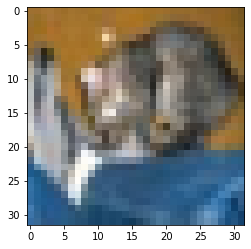

b'frog' , b'cat'


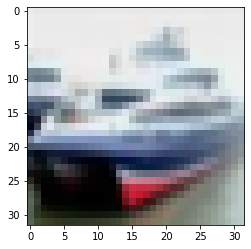

b'ship' , b'ship'


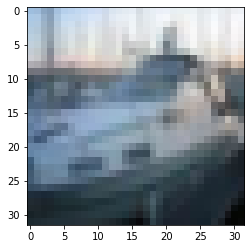

b'ship' , b'ship'


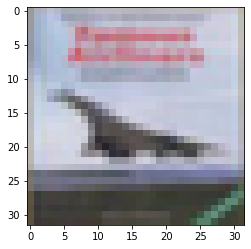

b'ship' , b'airplane'


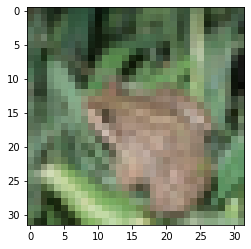

b'frog' , b'frog'


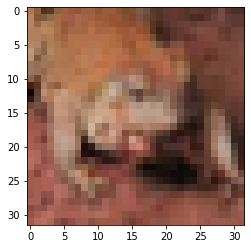

b'frog' , b'frog'


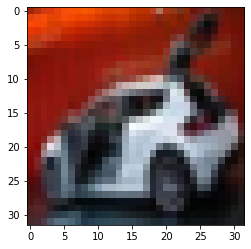

b'automobile' , b'automobile'


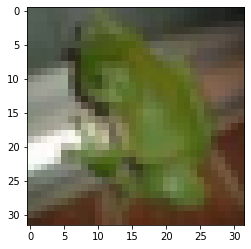

b'frog' , b'frog'


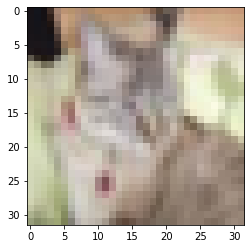

b'dog' , b'cat'


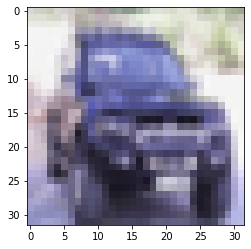

b'automobile' , b'automobile'


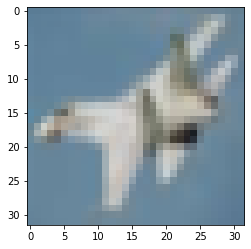

b'airplane' , b'airplane'


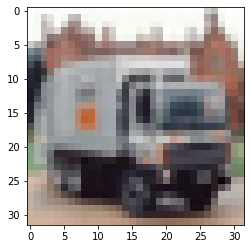

b'truck' , b'truck'


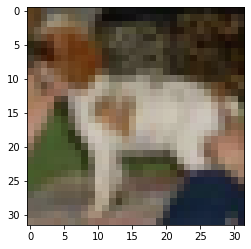

b'frog' , b'dog'


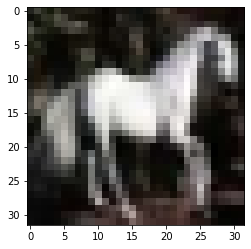

b'horse' , b'horse'


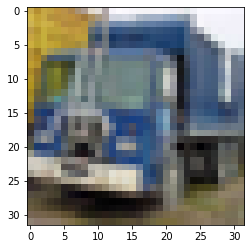

b'automobile' , b'truck'


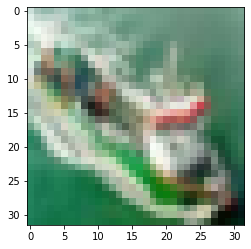

b'ship' , b'ship'


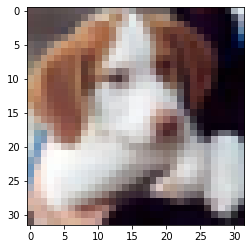

b'dog' , b'dog'


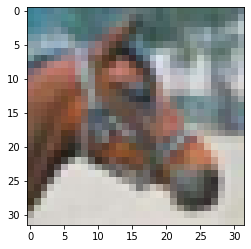

b'cat' , b'horse'


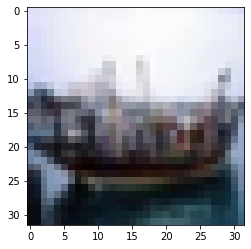

b'truck' , b'ship'


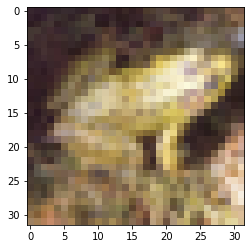

b'frog' , b'frog'


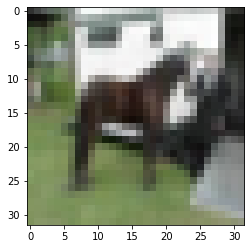

b'horse' , b'horse'


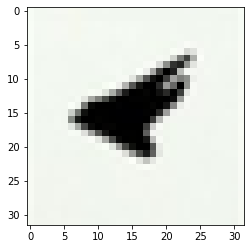

b'airplane' , b'airplane'


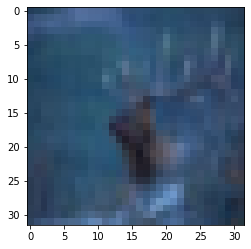

b'airplane' , b'deer'


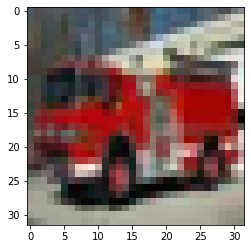

b'truck' , b'truck'


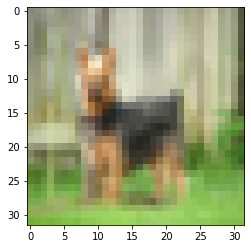

b'bird' , b'dog'


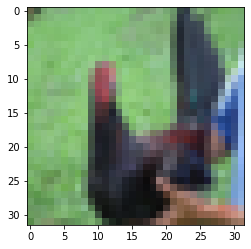

b'bird' , b'bird'


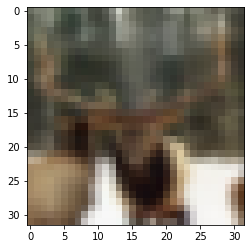

b'frog' , b'deer'


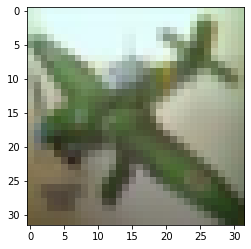

b'horse' , b'airplane'


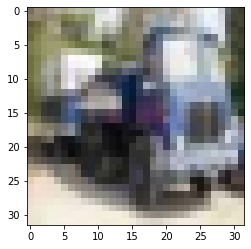

b'automobile' , b'truck'


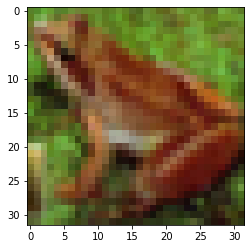

b'frog' , b'frog'


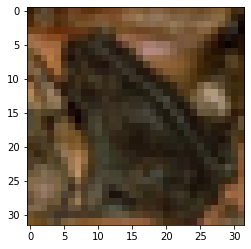

b'frog' , b'frog'


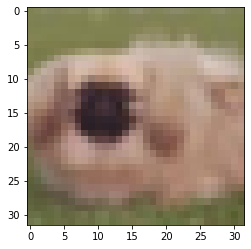

b'bird' , b'dog'


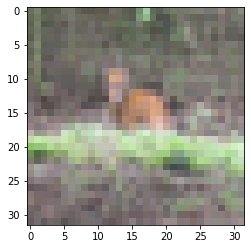

b'deer' , b'deer'


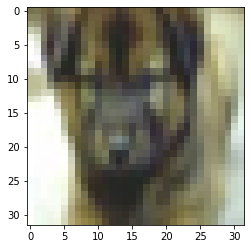

b'frog' , b'dog'


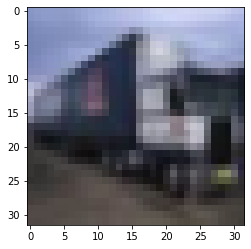

b'truck' , b'truck'


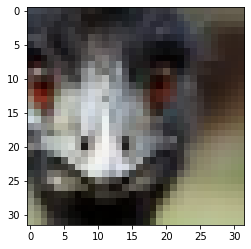

b'cat' , b'bird'


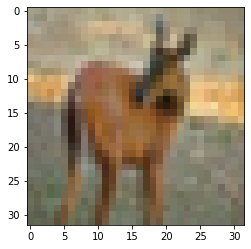

b'frog' , b'deer'


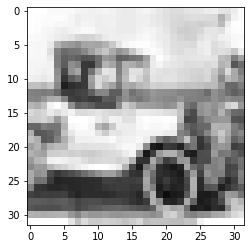

b'automobile' , b'automobile'


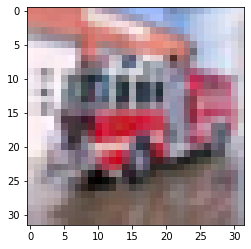

b'automobile' , b'truck'


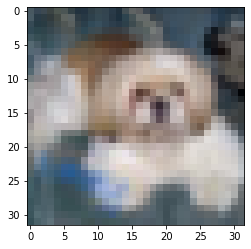

b'cat' , b'dog'


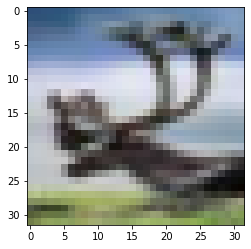

b'airplane' , b'deer'


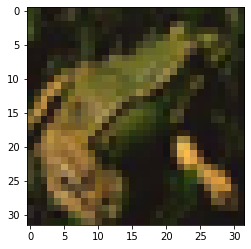

b'frog' , b'frog'


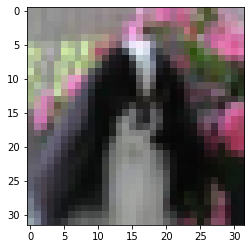

b'cat' , b'dog'


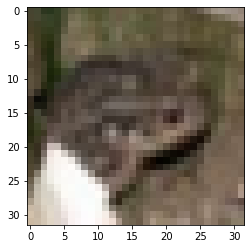

b'frog' , b'frog'


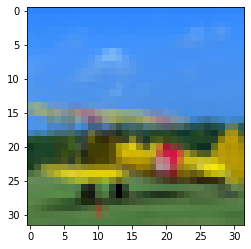

b'ship' , b'airplane'


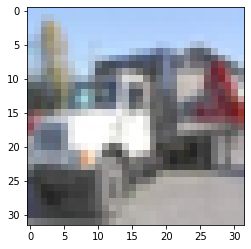

b'truck' , b'truck'


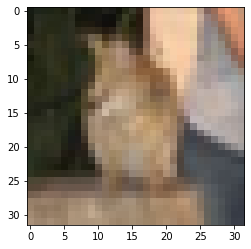

b'frog' , b'cat'


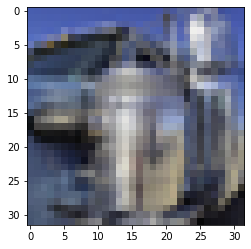

b'horse' , b'truck'


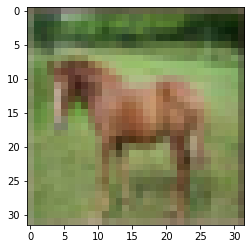

b'deer' , b'horse'


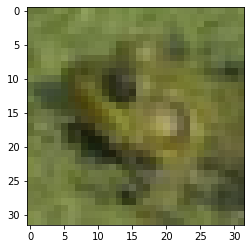

b'frog' , b'frog'


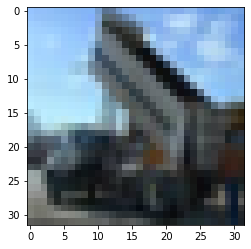

b'truck' , b'truck'


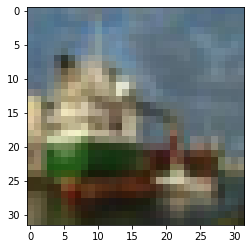

b'ship' , b'ship'


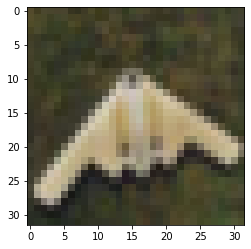

b'frog' , b'airplane'


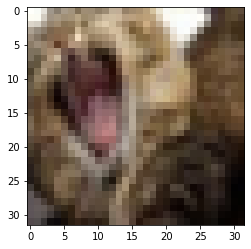

b'frog' , b'cat'


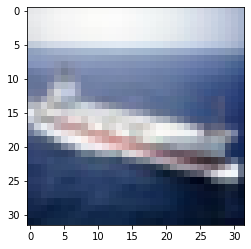

b'ship' , b'ship'


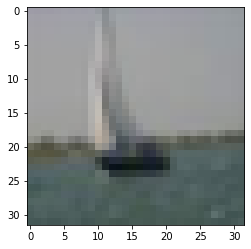

b'ship' , b'ship'


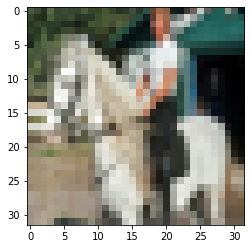

b'horse' , b'horse'


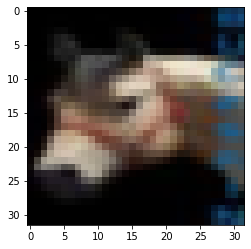

b'automobile' , b'horse'


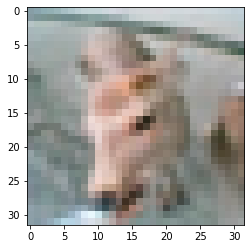

b'bird' , b'deer'


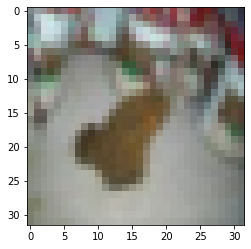

b'deer' , b'frog'


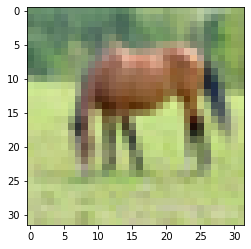

b'deer' , b'horse'


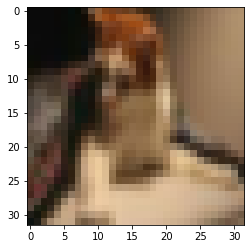

b'frog' , b'cat'


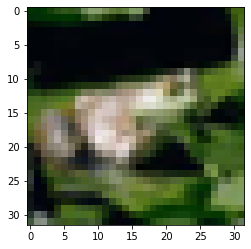

b'horse' , b'frog'


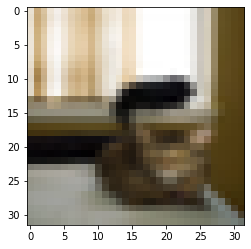

b'automobile' , b'cat'


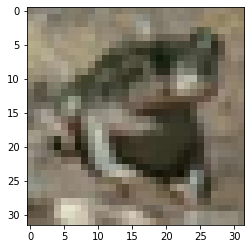

b'frog' , b'frog'


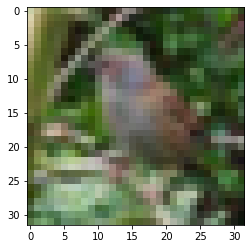

b'frog' , b'bird'


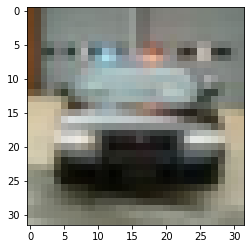

b'automobile' , b'automobile'


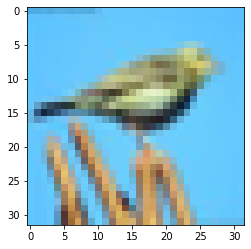

b'airplane' , b'bird'


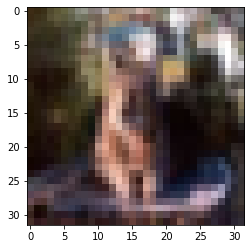

b'cat' , b'cat'


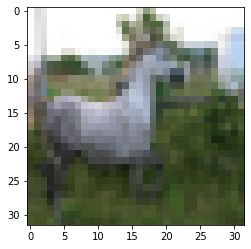

b'truck' , b'horse'


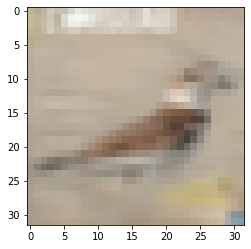

b'deer' , b'bird'


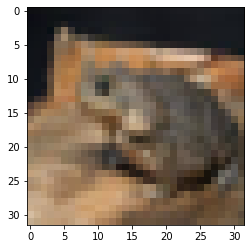

b'frog' , b'frog'


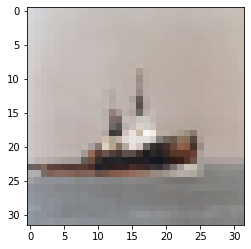

b'ship' , b'ship'


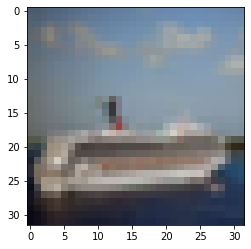

b'ship' , b'ship'


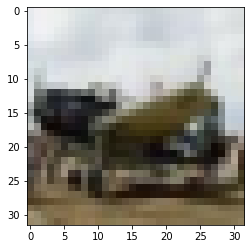

b'truck' , b'airplane'


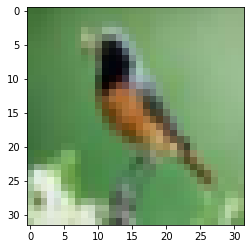

b'bird' , b'bird'


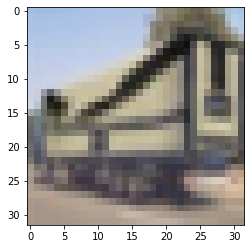

b'truck' , b'truck'


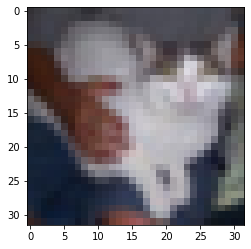

b'cat' , b'cat'


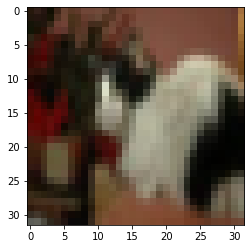

b'cat' , b'cat'


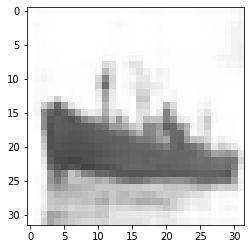

b'ship' , b'ship'


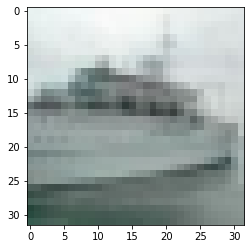

b'ship' , b'ship'


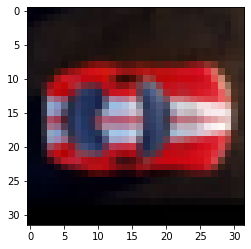

b'automobile' , b'automobile'


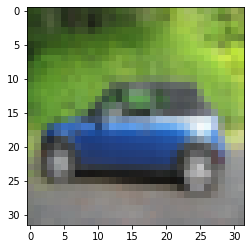

b'bird' , b'automobile'


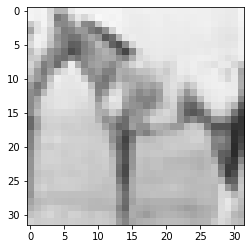

b'airplane' , b'horse'


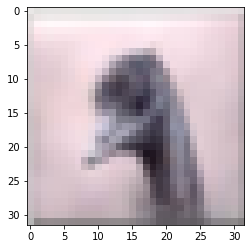

b'bird' , b'bird'


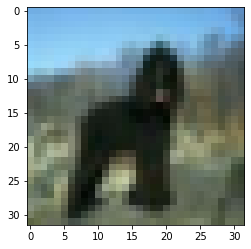

b'horse' , b'dog'


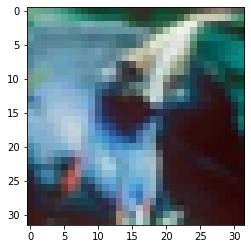

b'bird' , b'bird'


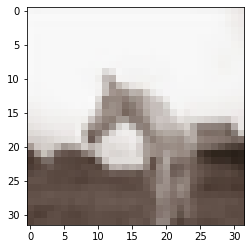

b'ship' , b'horse'


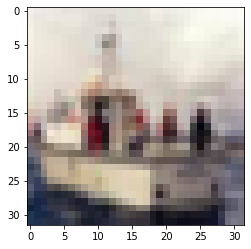

b'ship' , b'ship'


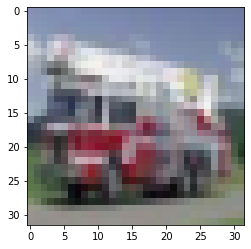

b'ship' , b'truck'


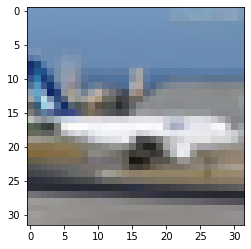

b'airplane' , b'airplane'


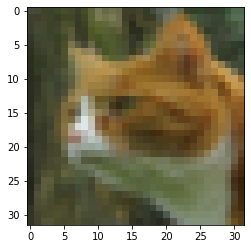

b'frog' , b'cat'


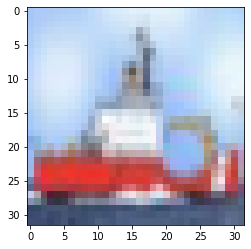

b'ship' , b'ship'


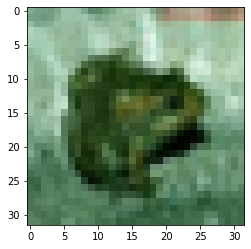

b'frog' , b'frog'


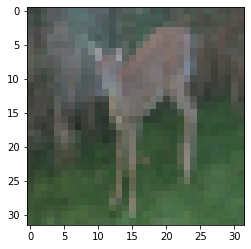

b'deer' , b'deer'


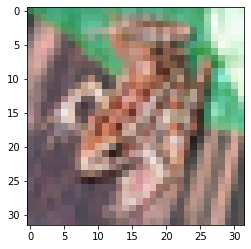

b'frog' , b'frog'


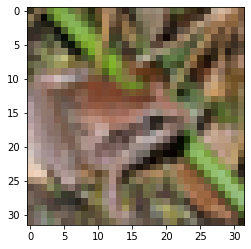

b'frog' , b'frog'


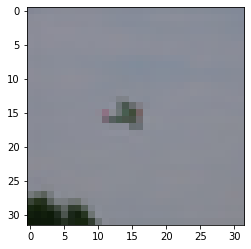

b'bird' , b'airplane'


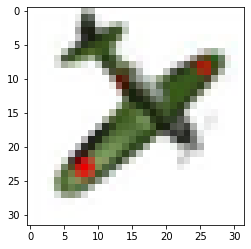

b'horse' , b'airplane'


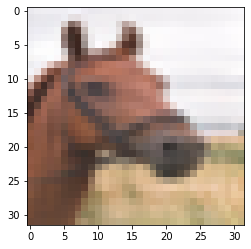

b'horse' , b'horse'


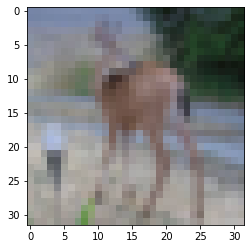

b'bird' , b'deer'


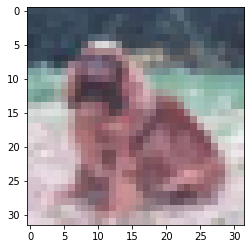

b'horse' , b'dog'


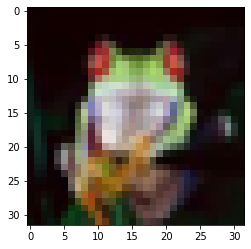

b'frog' , b'frog'


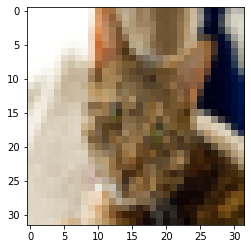

b'frog' , b'cat'


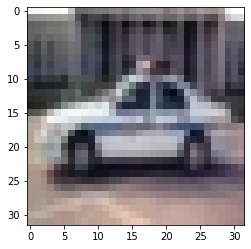

b'automobile' , b'automobile'


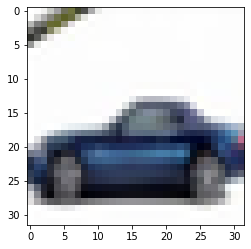

b'ship' , b'automobile'


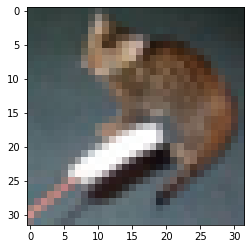

b'ship' , b'cat'


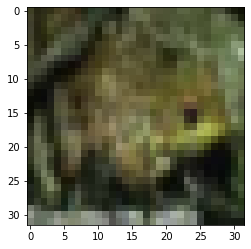

b'frog' , b'frog'


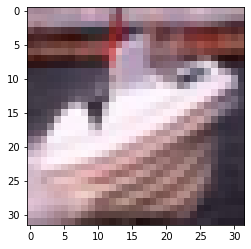

b'dog' , b'ship'


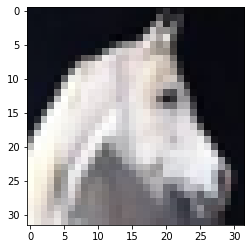

b'dog' , b'horse'


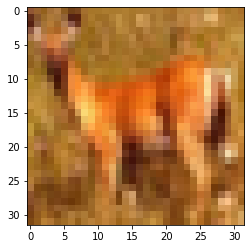

b'frog' , b'deer'


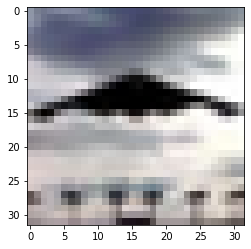

b'airplane' , b'airplane'


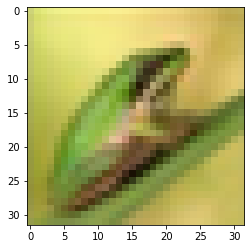

b'frog' , b'frog'


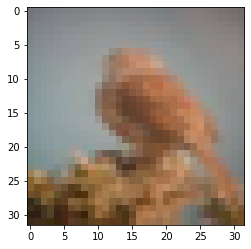

b'deer' , b'bird'


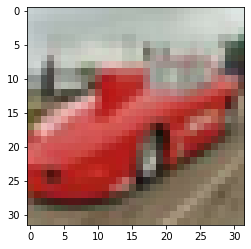

b'truck' , b'automobile'


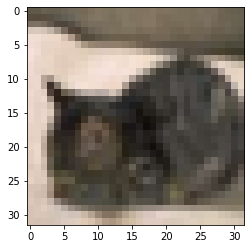

b'horse' , b'cat'


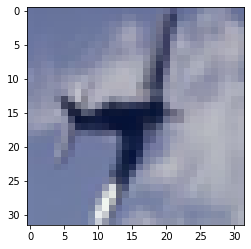

b'airplane' , b'airplane'


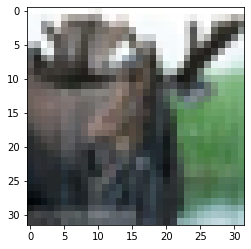

b'horse' , b'deer'


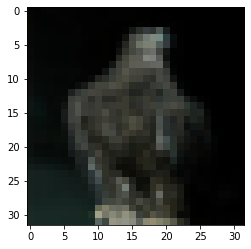

b'frog' , b'bird'


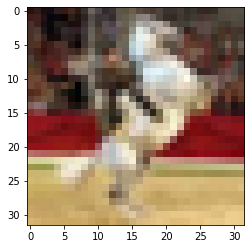

b'horse' , b'horse'


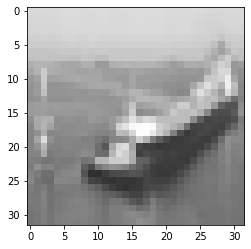

b'ship' , b'ship'


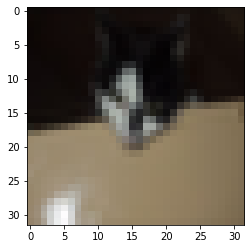

b'horse' , b'cat'


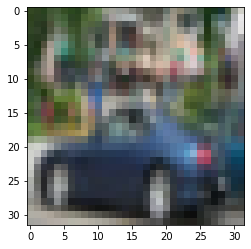

b'ship' , b'automobile'


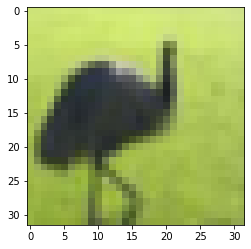

b'bird' , b'bird'


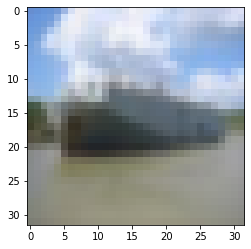

b'airplane' , b'ship'


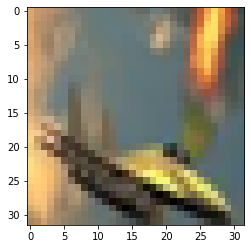

b'frog' , b'airplane'


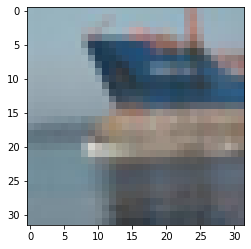

b'ship' , b'ship'


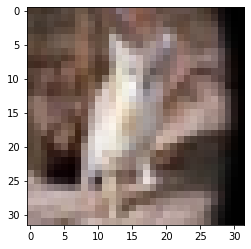

b'dog' , b'cat'


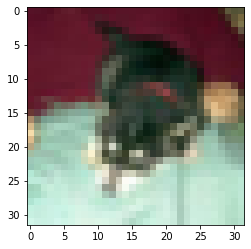

b'cat' , b'dog'


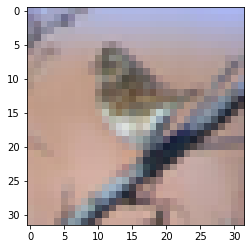

b'bird' , b'bird'


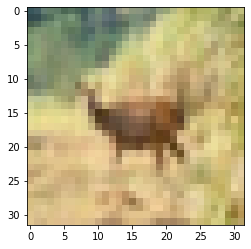

b'deer' , b'deer'


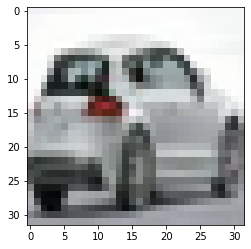

b'truck' , b'automobile'


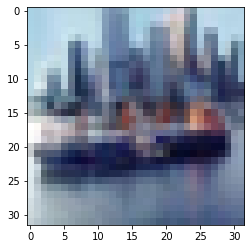

b'ship' , b'ship'


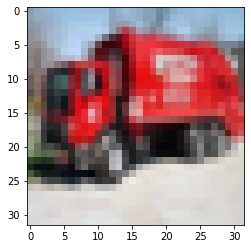

b'truck' , b'truck'


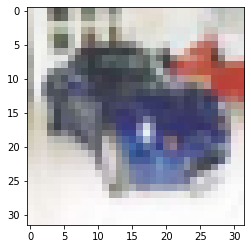

b'airplane' , b'automobile'


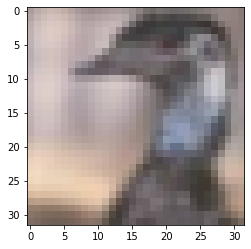

b'cat' , b'bird'


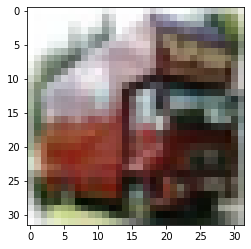

b'truck' , b'truck'


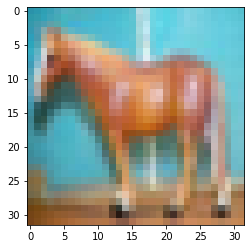

b'ship' , b'horse'


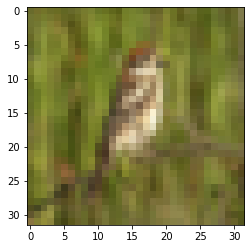

b'bird' , b'bird'


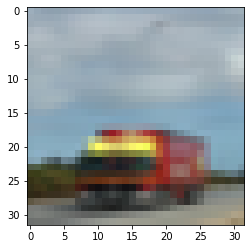

b'ship' , b'truck'


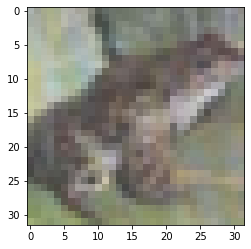

b'deer' , b'frog'


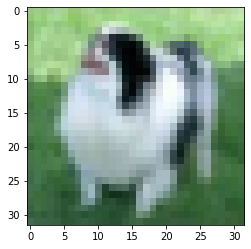

b'dog' , b'dog'


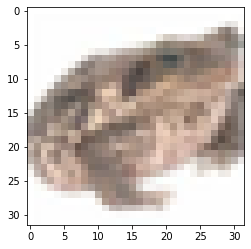

b'cat' , b'frog'


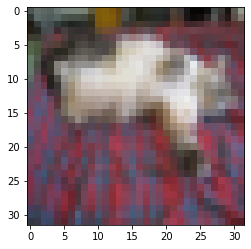

b'dog' , b'cat'


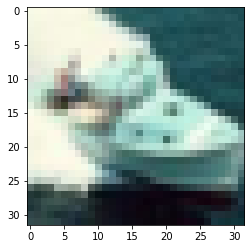

b'ship' , b'ship'


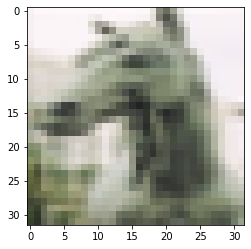

b'cat' , b'horse'


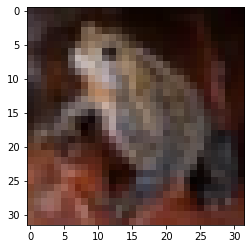

b'frog' , b'frog'


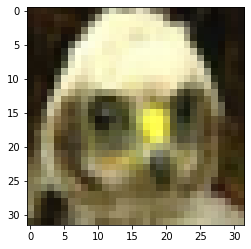

b'frog' , b'bird'


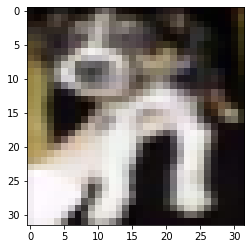

b'dog' , b'dog'


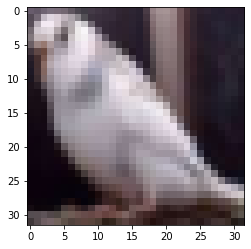

b'dog' , b'bird'


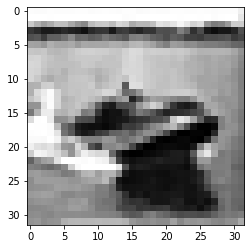

b'automobile' , b'ship'


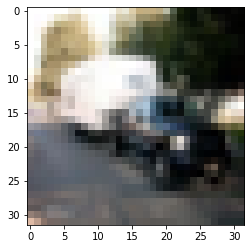

b'automobile' , b'truck'


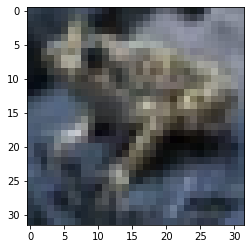

b'frog' , b'frog'


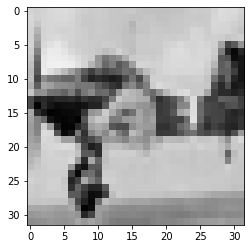

b'airplane' , b'airplane'


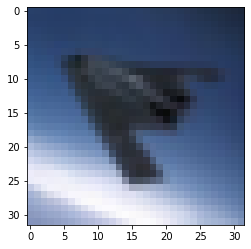

b'airplane' , b'airplane'


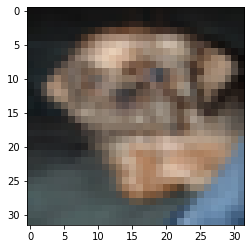

b'frog' , b'dog'


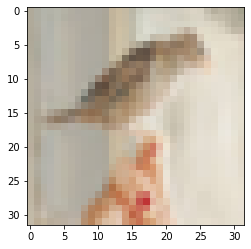

b'bird' , b'bird'


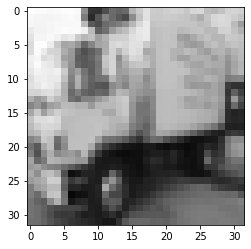

b'truck' , b'truck'


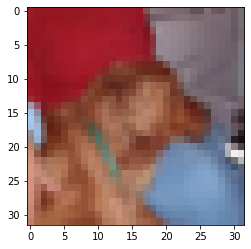

b'frog' , b'dog'


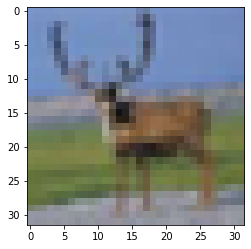

b'deer' , b'deer'


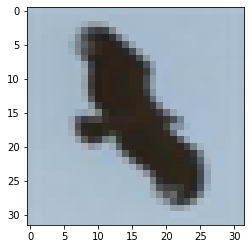

b'bird' , b'bird'


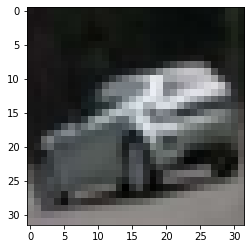

b'automobile' , b'automobile'


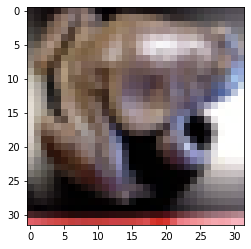

b'automobile' , b'frog'


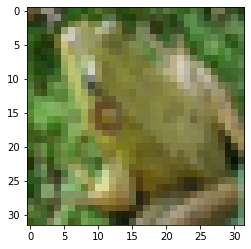

b'frog' , b'frog'


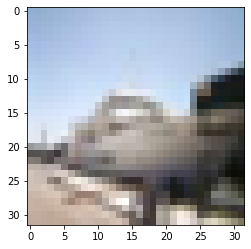

b'ship' , b'ship'


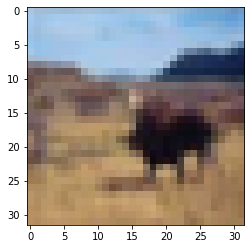

b'horse' , b'deer'


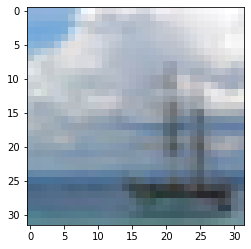

b'ship' , b'ship'


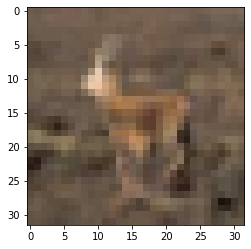

b'frog' , b'deer'


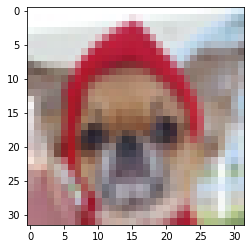

b'horse' , b'dog'


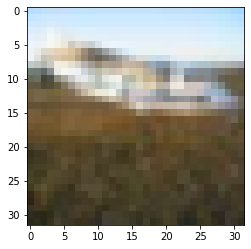

b'horse' , b'airplane'


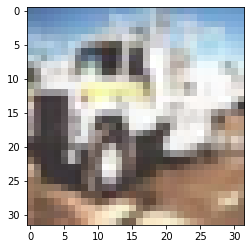

b'truck' , b'truck'


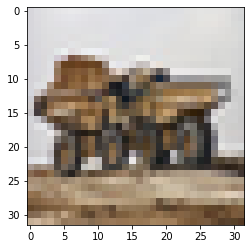

b'truck' , b'truck'


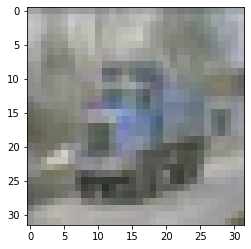

b'ship' , b'truck'


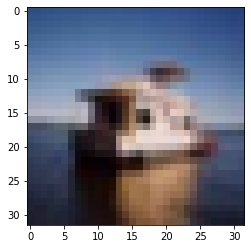

b'ship' , b'ship'


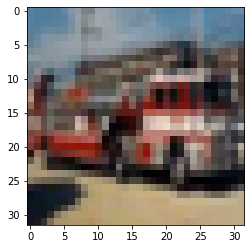

b'truck' , b'truck'


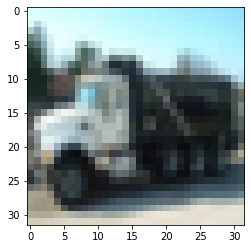

b'truck' , b'truck'


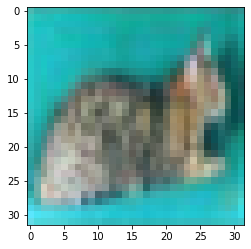

b'deer' , b'cat'


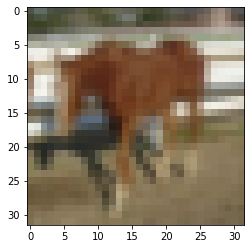

b'frog' , b'horse'


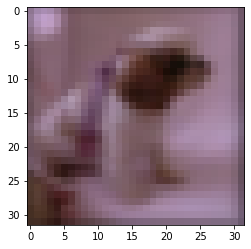

b'dog' , b'dog'


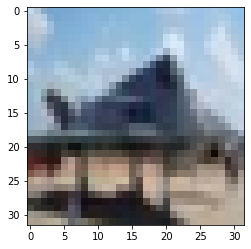

b'truck' , b'airplane'


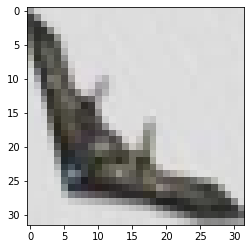

b'ship' , b'airplane'


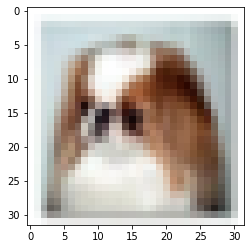

b'horse' , b'dog'


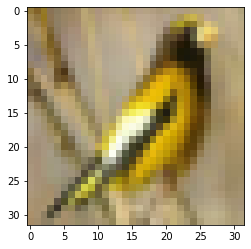

b'frog' , b'bird'


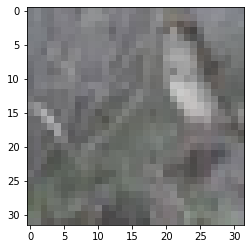

b'bird' , b'bird'


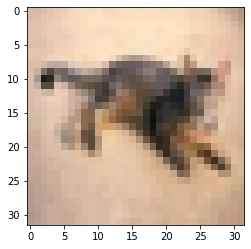

b'horse' , b'cat'


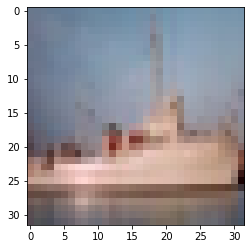

b'ship' , b'ship'


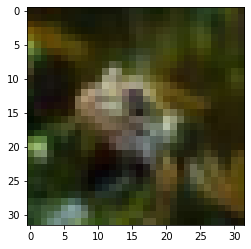

b'frog' , b'frog'


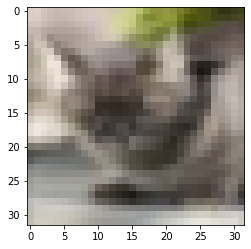

b'cat' , b'cat'


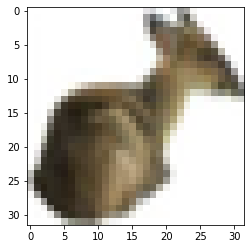

b'horse' , b'deer'


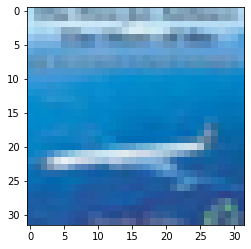

b'ship' , b'airplane'


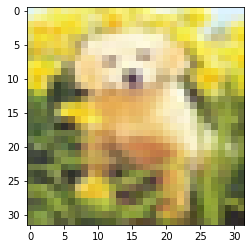

b'frog' , b'dog'


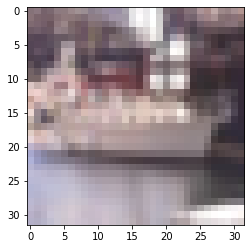

b'ship' , b'ship'


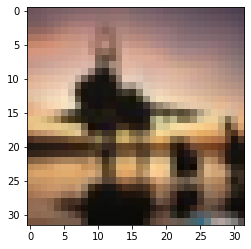

b'automobile' , b'airplane'


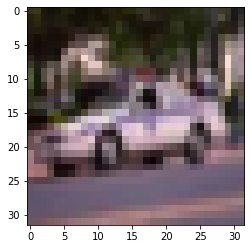

b'automobile' , b'automobile'


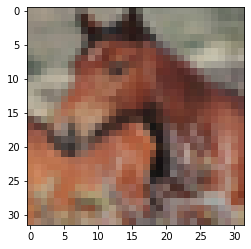

b'horse' , b'horse'


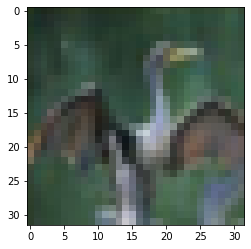

b'deer' , b'bird'


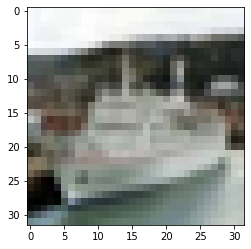

b'truck' , b'ship'


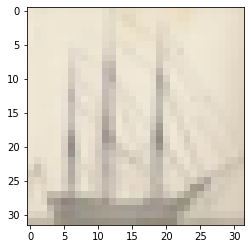

b'bird' , b'ship'


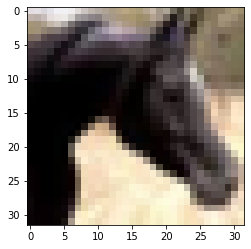

b'horse' , b'horse'


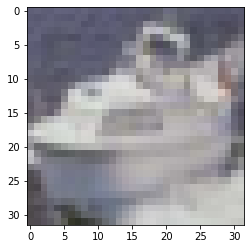

b'ship' , b'ship'


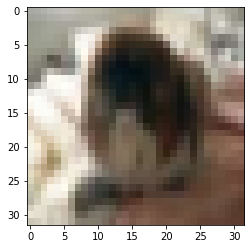

b'cat' , b'dog'


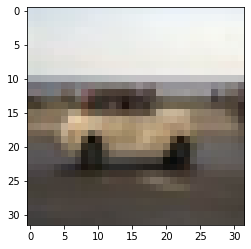

b'ship' , b'automobile'


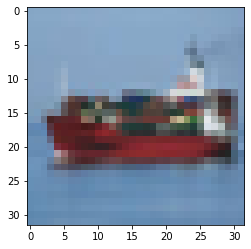

b'ship' , b'ship'


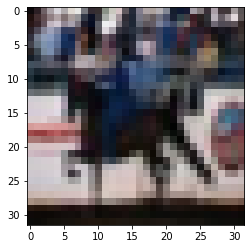

b'horse' , b'horse'


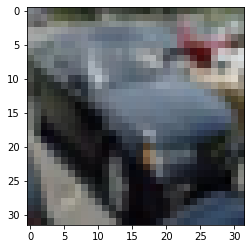

b'automobile' , b'automobile'


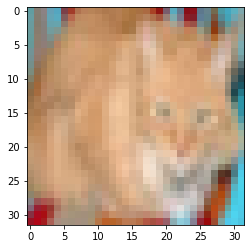

b'frog' , b'cat'


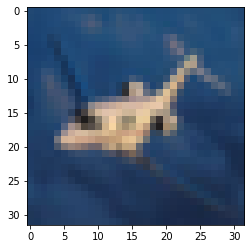

b'ship' , b'airplane'


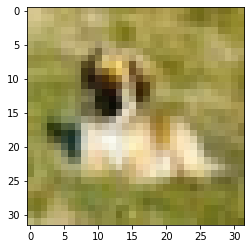

b'dog' , b'dog'


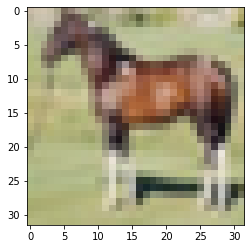

b'bird' , b'horse'


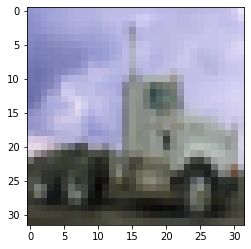

b'ship' , b'truck'


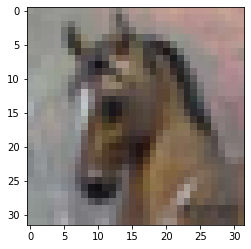

b'bird' , b'horse'


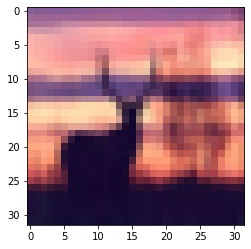

b'automobile' , b'deer'


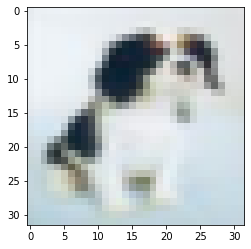

b'cat' , b'dog'


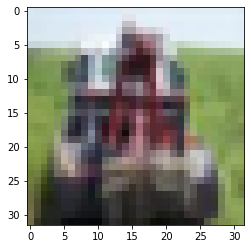

b'truck' , b'truck'


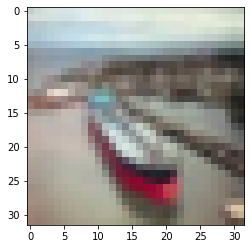

b'airplane' , b'ship'


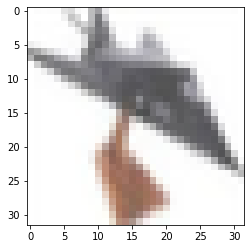

b'airplane' , b'airplane'


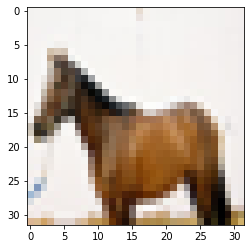

b'horse' , b'horse'


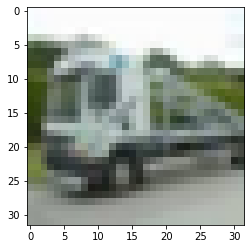

b'truck' , b'truck'


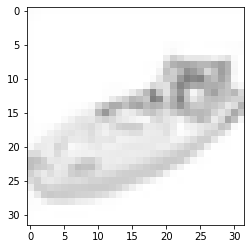

b'airplane' , b'ship'


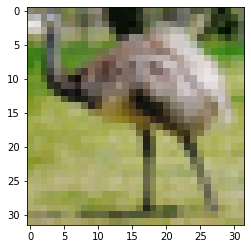

b'horse' , b'bird'


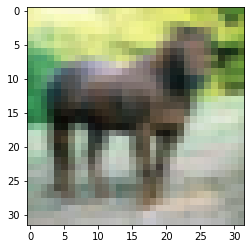

b'bird' , b'horse'


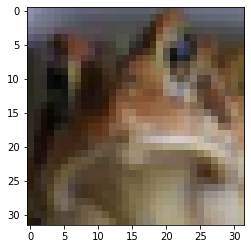

b'frog' , b'frog'


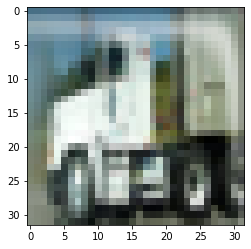

b'truck' , b'truck'


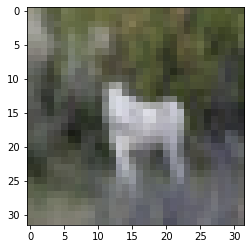

b'bird' , b'deer'


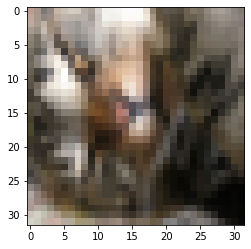

b'frog' , b'cat'


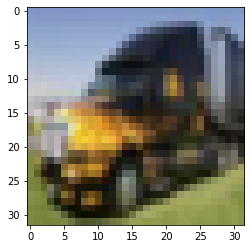

b'truck' , b'truck'


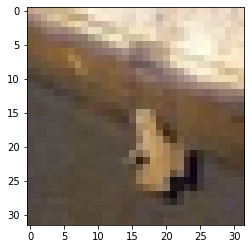

b'frog' , b'frog'


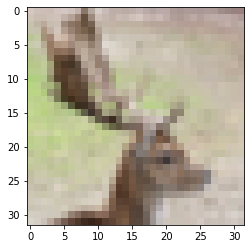

b'deer' , b'deer'


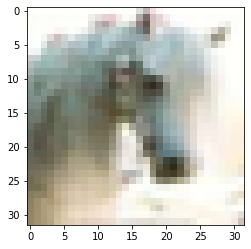

b'bird' , b'horse'


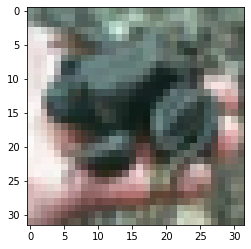

b'automobile' , b'frog'


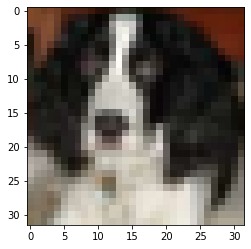

b'dog' , b'dog'


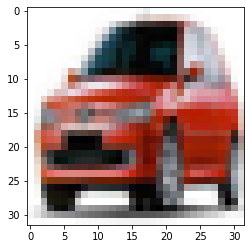

b'truck' , b'automobile'


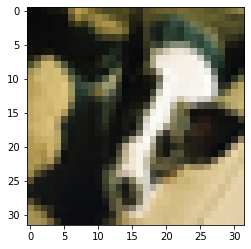

b'cat' , b'dog'


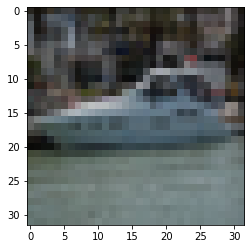

b'automobile' , b'ship'


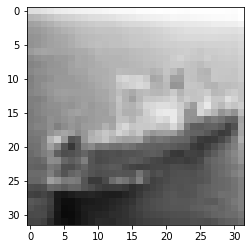

b'ship' , b'ship'


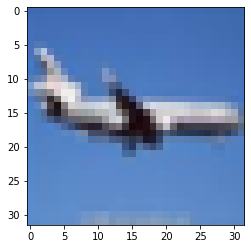

b'airplane' , b'airplane'


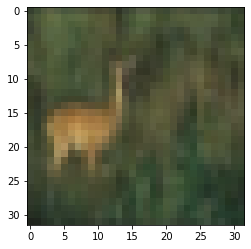

b'deer' , b'deer'


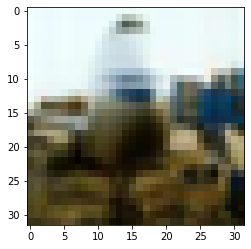

b'truck' , b'airplane'


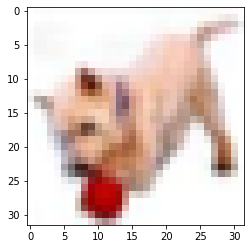

b'frog' , b'dog'


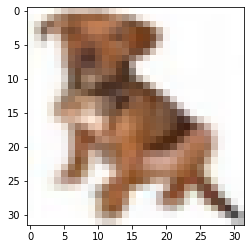

b'cat' , b'dog'


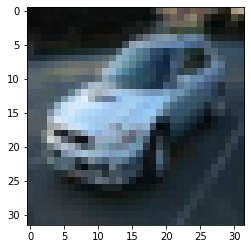

b'automobile' , b'automobile'


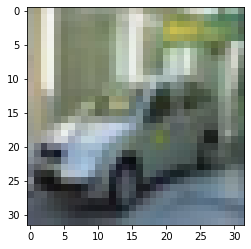

b'ship' , b'automobile'


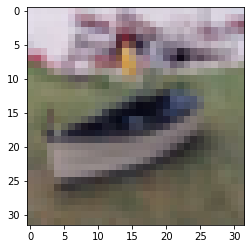

b'truck' , b'ship'


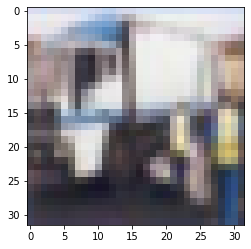

b'truck' , b'truck'


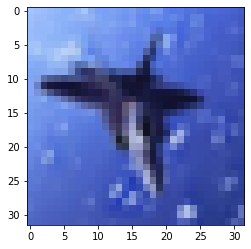

b'airplane' , b'airplane'


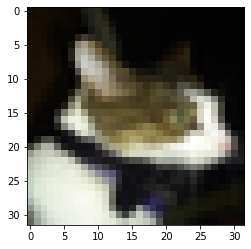

b'frog' , b'cat'


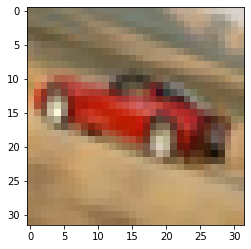

b'deer' , b'automobile'


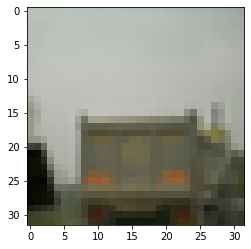

b'ship' , b'truck'


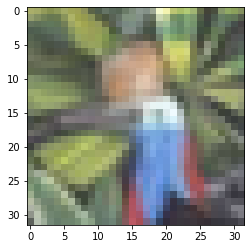

b'bird' , b'bird'


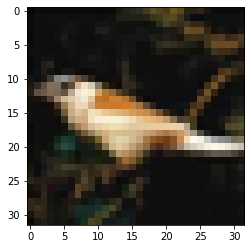

b'automobile' , b'bird'


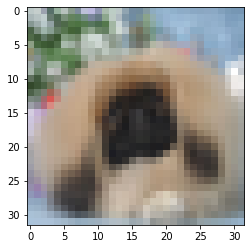

b'bird' , b'dog'


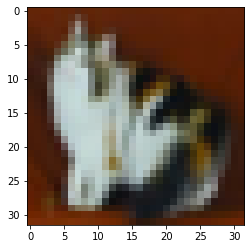

b'cat' , b'cat'


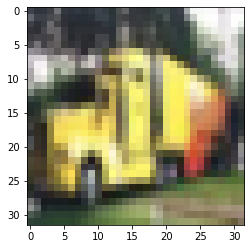

b'frog' , b'truck'


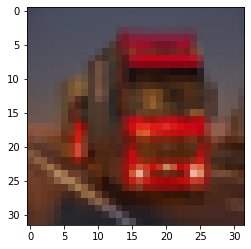

b'truck' , b'truck'


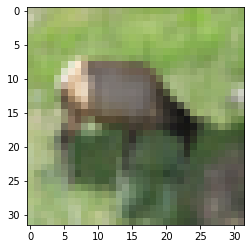

b'frog' , b'deer'


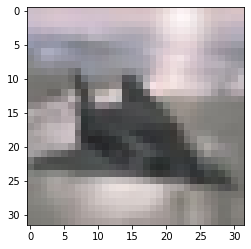

b'ship' , b'airplane'


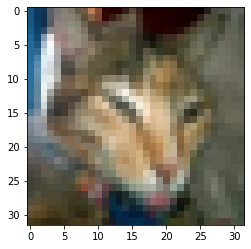

b'frog' , b'cat'


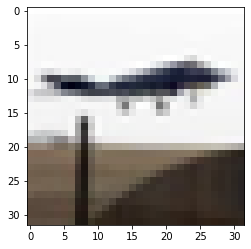

b'automobile' , b'airplane'


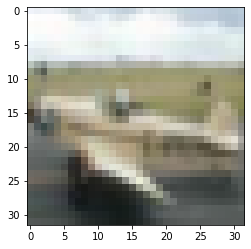

b'ship' , b'airplane'


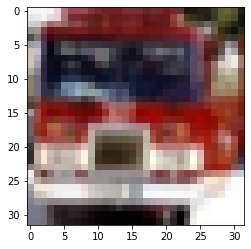

b'automobile' , b'truck'


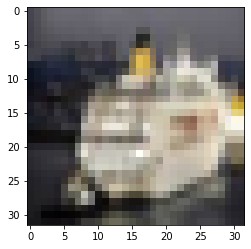

b'ship' , b'ship'


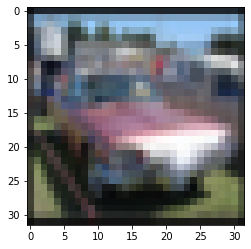

b'ship' , b'automobile'


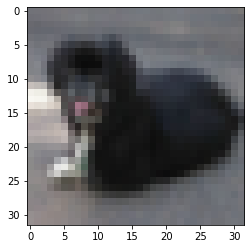

b'cat' , b'dog'


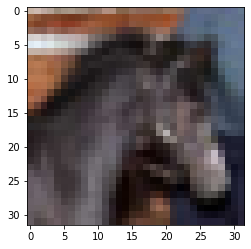

b'frog' , b'horse'


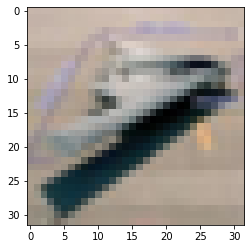

b'airplane' , b'airplane'


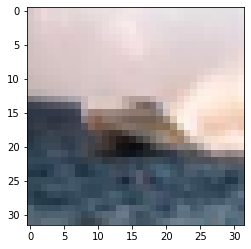

b'ship' , b'ship'


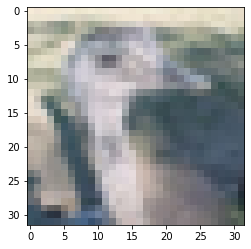

b'bird' , b'bird'


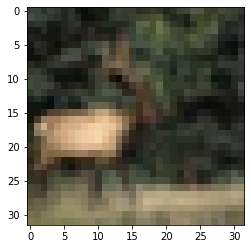

b'deer' , b'deer'


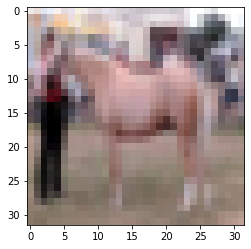

b'horse' , b'horse'


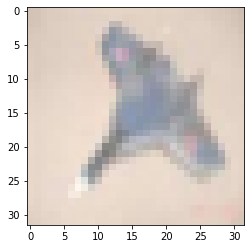

b'bird' , b'airplane'


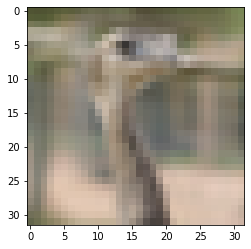

b'bird' , b'bird'


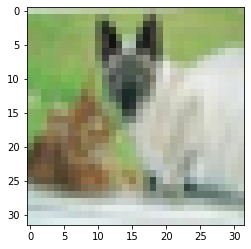

b'bird' , b'cat'


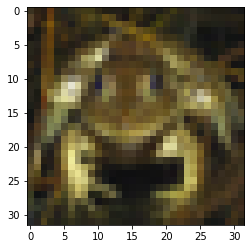

b'frog' , b'frog'


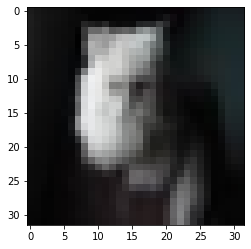

b'dog' , b'cat'


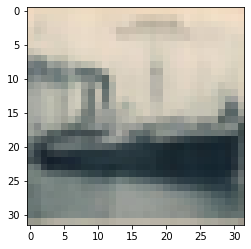

b'ship' , b'ship'


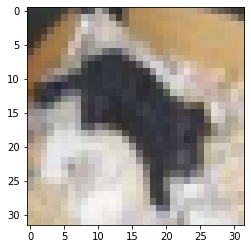

b'dog' , b'dog'


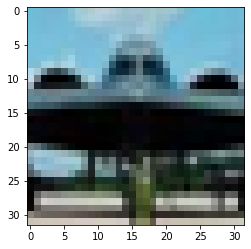

b'truck' , b'airplane'


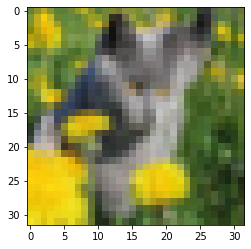

b'horse' , b'cat'


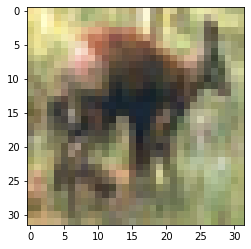

b'bird' , b'deer'


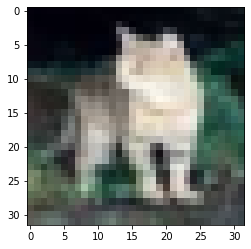

b'dog' , b'cat'


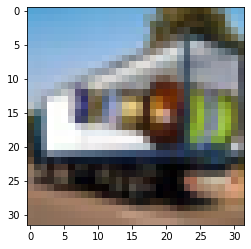

b'truck' , b'truck'


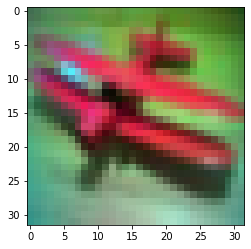

b'automobile' , b'airplane'


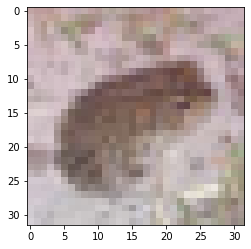

b'cat' , b'frog'


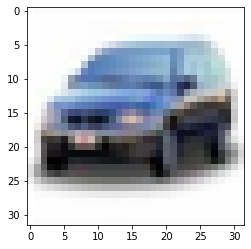

b'automobile' , b'automobile'


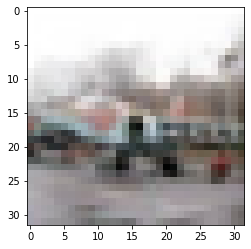

b'ship' , b'airplane'


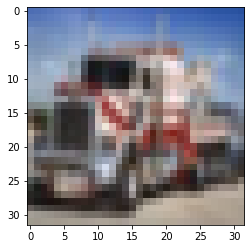

b'truck' , b'truck'


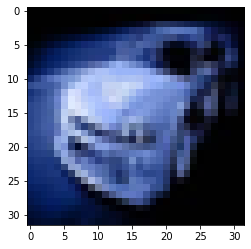

b'automobile' , b'automobile'


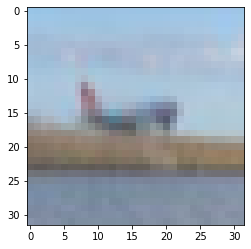

b'ship' , b'airplane'


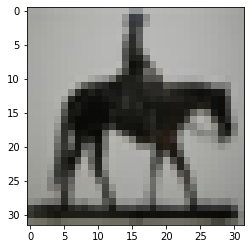

b'horse' , b'horse'


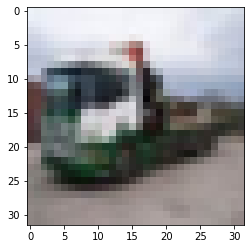

b'truck' , b'truck'


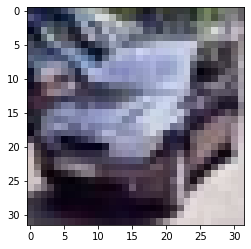

b'automobile' , b'automobile'


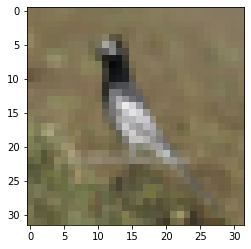

b'bird' , b'bird'


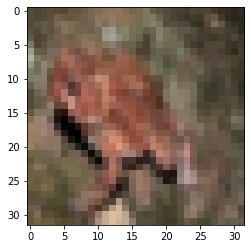

b'frog' , b'frog'


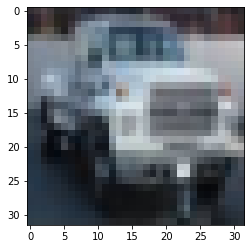

b'automobile' , b'truck'


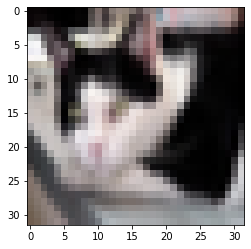

b'dog' , b'cat'


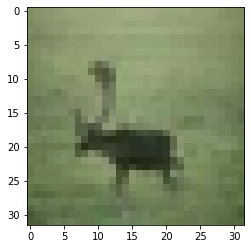

b'deer' , b'deer'


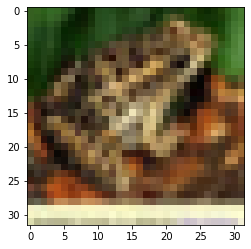

b'frog' , b'frog'


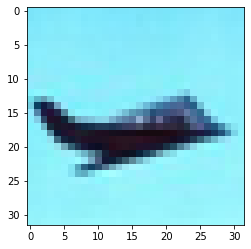

b'airplane' , b'airplane'


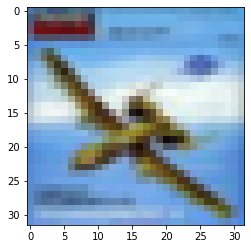

b'airplane' , b'airplane'


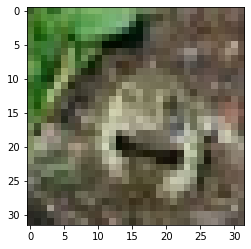

b'frog' , b'frog'


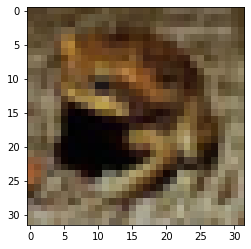

b'frog' , b'frog'


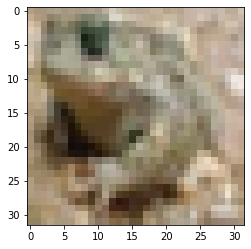

b'frog' , b'frog'


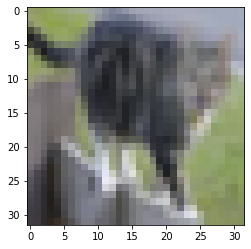

b'bird' , b'cat'


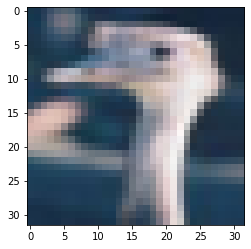

b'ship' , b'bird'


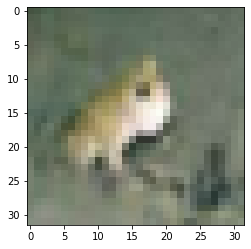

b'deer' , b'frog'


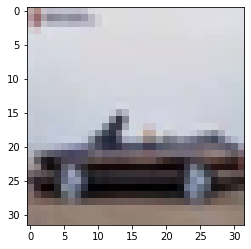

b'ship' , b'automobile'


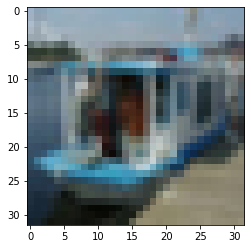

b'airplane' , b'ship'


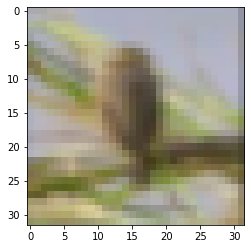

b'bird' , b'bird'


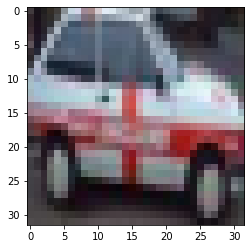

b'automobile' , b'automobile'


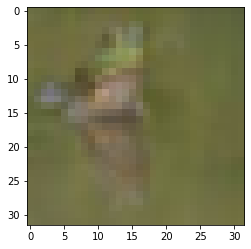

b'deer' , b'frog'


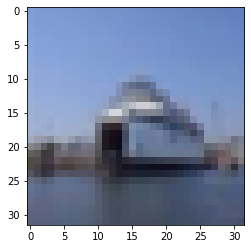

b'airplane' , b'ship'


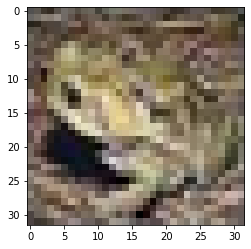

b'frog' , b'frog'


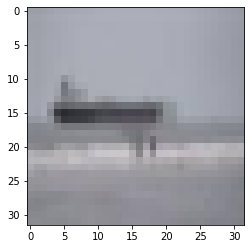

b'airplane' , b'ship'


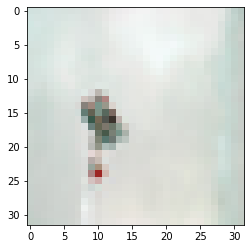

b'airplane' , b'airplane'


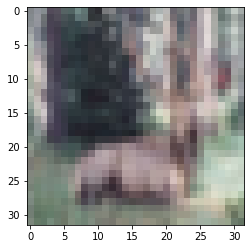

b'bird' , b'deer'


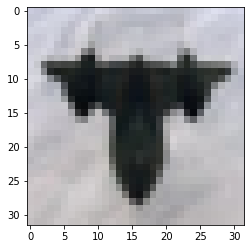

b'horse' , b'airplane'


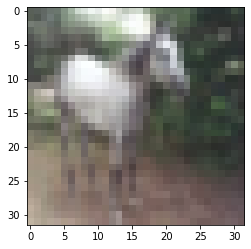

b'horse' , b'horse'


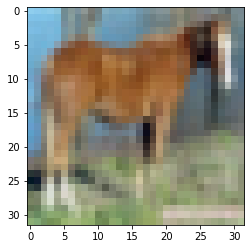

b'horse' , b'horse'


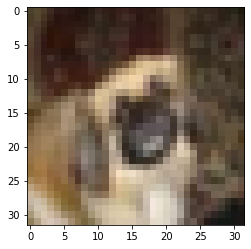

b'dog' , b'dog'


KeyboardInterrupt: 

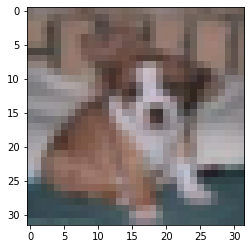

In [5]:
test_visual(model,test_dataset,meta)